# Assignment 2: Group Project 

Dataset : Life Expectancy (#19)

Authored by:
- Amber Jain
- Miles Danswan
- Cedric Quenette
- Isaan Gleeson


In [1]:
# Installing major libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import researchpy as rp
from scipy.stats import mstats
from scipy import stats
pd.options.mode.chained_assignment = None  # default='warn'
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from matplotlib.colors import ListedColormap

In [2]:
# Reading data from the csv file
data = pd.read_csv('life_expectancy_data.csv')
data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

Whitespace detected in the column names

In [3]:
# Removing whitespace using rename() function
data.rename(columns=lambda x: x.strip(), inplace=True)

# Having a look at different properties of da
data.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


# Detecting and refilling null values

To clean the data, null values are to be located, this can be done via isnull() function, and percentage of null values has also been calculated. 

In [4]:
null_values = data.isnull().sum()
print(null_values)

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64


In [5]:
percentage_null_values = null_values * 100/len(data)
print (percentage_null_values[percentage_null_values > 0])

Life expectancy                     0.340368
Adult Mortality                     0.340368
Alcohol                             6.603131
Hepatitis B                        18.822328
BMI                                 1.157250
Polio                               0.646698
Total expenditure                   7.692308
Diphtheria                          0.646698
GDP                                15.248468
Population                         22.191967
thinness  1-19 years                1.157250
thinness 5-9 years                  1.157250
Income composition of resources     5.684139
Schooling                           5.547992
dtype: float64


As seen from the results above, 3 columns named 'Hepatitis B', 'GDP' and 'Population' have more that 15% null values, which is very high.

The next stage is filling these missing values with suitable values, we are using 'linear interpolation' technique, which fills out the missing value using previous and next value. It assumes that the value will lie on a straight line, and the centre of that line is returned as missing value, this is by far the most accurate method to fill the missing values. 

We have grouped the column by 'Country', which means that the loop will run for each country. We will not be using 3 columns namely (GDP, Popualation and Hepatitis B), as it will lead to misinterpretation of data.

In [6]:
# Grouping them by countries and interpolating linearly

# temporary dataframe variable to store each group
temp = pd.DataFrame(columns=data.columns)

# grouping the main data by country
grouped_by_country = data.groupby("Country")

for name, group in grouped_by_country:
    # Filling these null values using linear interpolation and rounding them off to 1 decimal place
    group = round(group.interpolate(), 1)
    temp = temp.append(group)

# Linear interpolation has changed the 'int' type data to 'object' type, so converting them back to original types.
temp['infant deaths'] = temp['infant deaths'].astype(int)
temp['Measles'] = temp['Measles'].astype(int)
temp['Year'] = temp['Year'].astype(int)
temp['under-five deaths'] = temp['under-five deaths'].astype(int)

# Finally writing it to the main data
data = temp

# Having a look at null value percentage
percentage_null_values = (data.isnull().sum()) * 100/len(data)
print (percentage_null_values[percentage_null_values > 0])

Life expectancy                     0.340368
Adult Mortality                     0.340368
Alcohol                             6.569095
Hepatitis B                         4.901293
BMI                                 1.157250
Total expenditure                   7.181756
GDP                                14.363513
Population                         22.191967
thinness  1-19 years                1.157250
thinness 5-9 years                  1.157250
Income composition of resources     5.684139
Schooling                           5.547992
dtype: float64


The percentage for many missing values in many columns (Alcohol, Hepatitis B, Total expenditure and GDP) has reduced drastically. The ones which haven't changed have missing values for the whole country. For example, USA does not contain GDP data.

After using linear interpolation, other methods are used to fill in values depending on a case by case basis. Life expectancy, the target variable is filled using mean(), and is grouped by year. The other variables are filled by the 'ffill' method, which copies the value from the preceeding variable. These methods have been decided after carefully observing the variables on a spreadsheet and evaluating the impact each has on the data.

In [7]:
data['Life expectancy'].fillna(round(data.groupby(['Year'])['Life expectancy'].transform('mean') , 1), inplace = True)

# These needs to be replaced with last values again as they might not have been in the same country group
data['BMI'].fillna(method='ffill', inplace=True)
data['Total expenditure'].fillna(method='ffill', inplace=True)
data['Income composition of resources'].fillna(method='ffill', inplace=True)
data['Adult Mortality'].fillna(method='ffill', inplace=True)
data['Alcohol'].fillna(method='ffill', inplace=True)
data['Polio'].fillna(method='ffill', inplace=True)
data['Diphtheria'].fillna(method='ffill', inplace=True)
data['thinness  1-19 years'].fillna(method='ffill', inplace=True)
data['thinness 5-9 years'].fillna(method='ffill', inplace=True)
data['Schooling'].fillna(method='ffill', inplace=True)


In [8]:
# Printing the percentage of nulls now
percentage_null_values = (data.isnull().sum()) * 100/len(data)
print (percentage_null_values)

Country                             0.000000
Year                                0.000000
Status                              0.000000
Life expectancy                     0.000000
Adult Mortality                     0.000000
infant deaths                       0.000000
Alcohol                             0.000000
percentage expenditure              0.000000
Hepatitis B                         4.901293
Measles                             0.000000
BMI                                 0.000000
under-five deaths                   0.000000
Polio                               0.000000
Total expenditure                   0.000000
Diphtheria                          0.000000
HIV/AIDS                            0.000000
GDP                                14.363513
Population                         22.191967
thinness  1-19 years                0.000000
thinness 5-9 years                  0.000000
Income composition of resources     0.000000
Schooling                           0.000000
dtype: flo

All the null values have been filled by suitable values for each column, except Hepatitis B, GDP and Population, as these have too many (over 15%) missing values, and any refill on these columns will produce wrong results. 

So we will not be using these columns to do our exploratory data analysis. 

# Detecting Outliers

Box plots are considered to be some of the best tools to catch outliers, the way it catches these are: any values lesser than 25% and more than 75% percentile is considered as an outlier. So we have drawn box plots for all the columns (continuos and discrete values) to detect outliers.

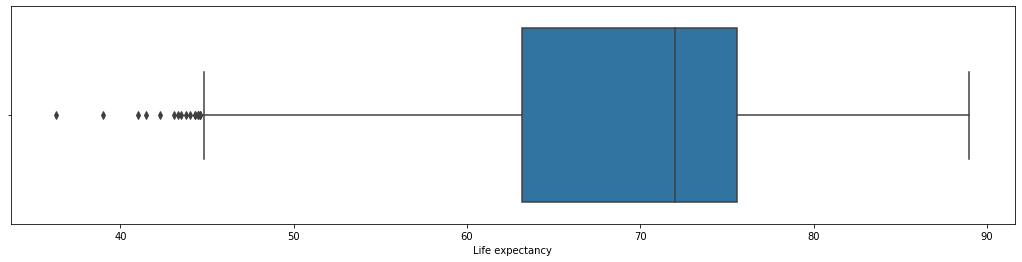

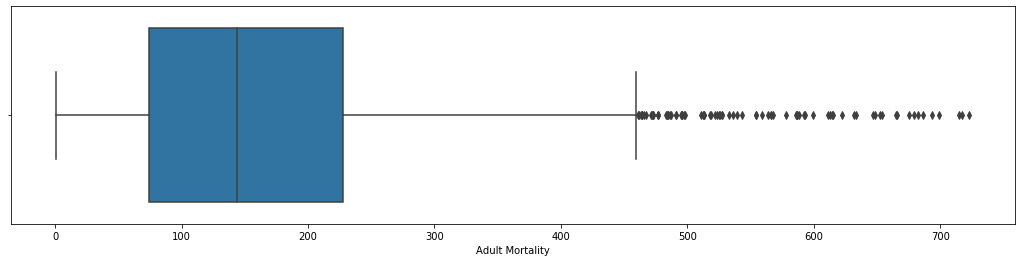

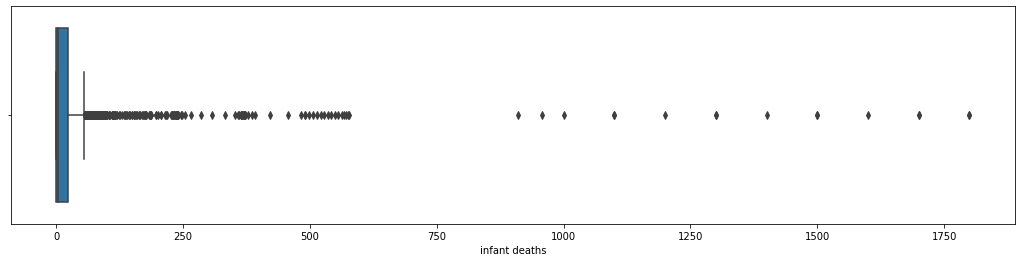

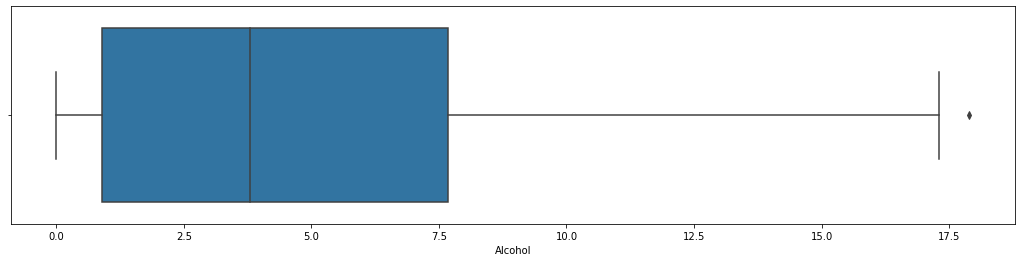

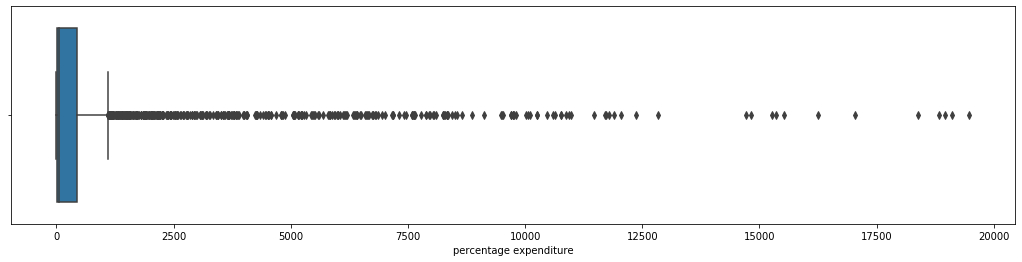

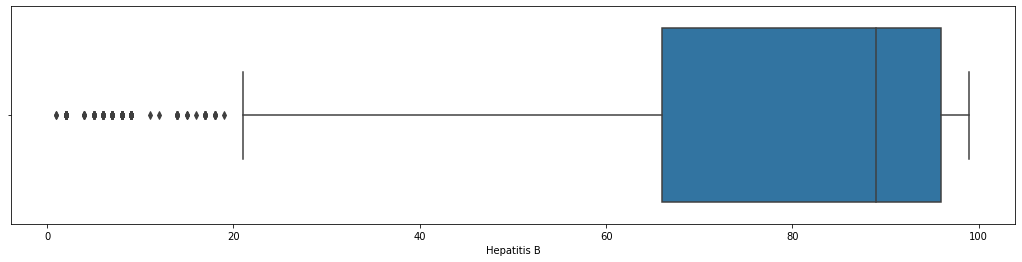

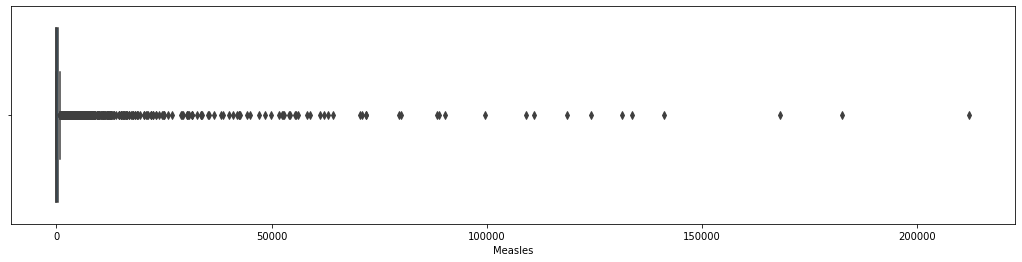

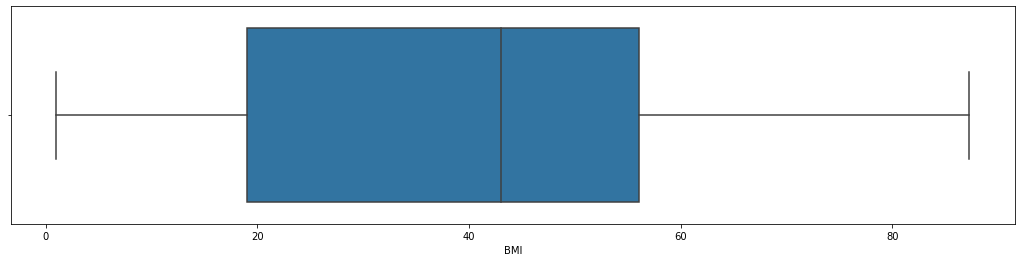

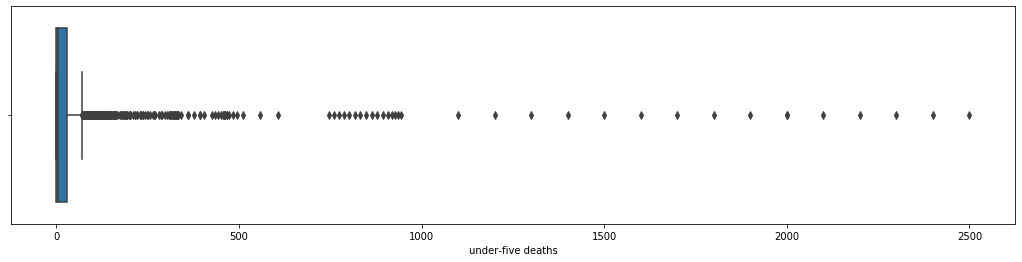

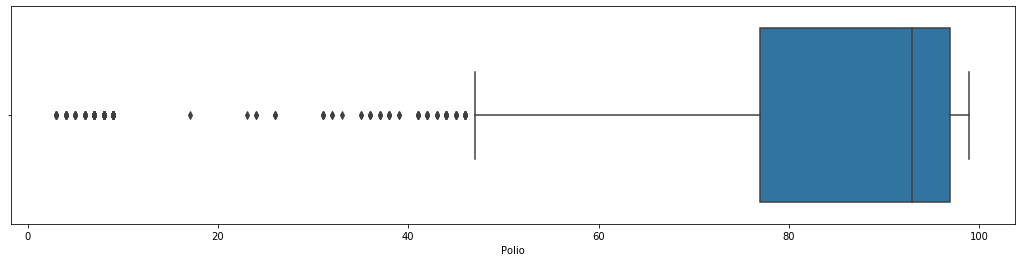

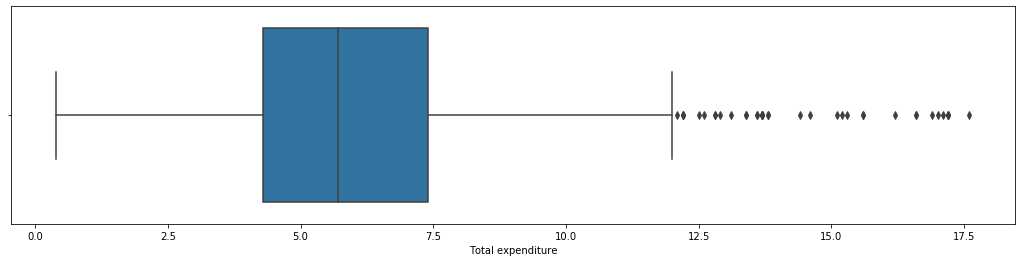

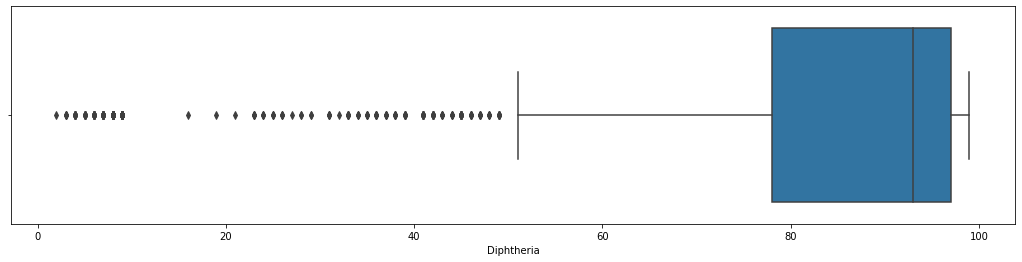

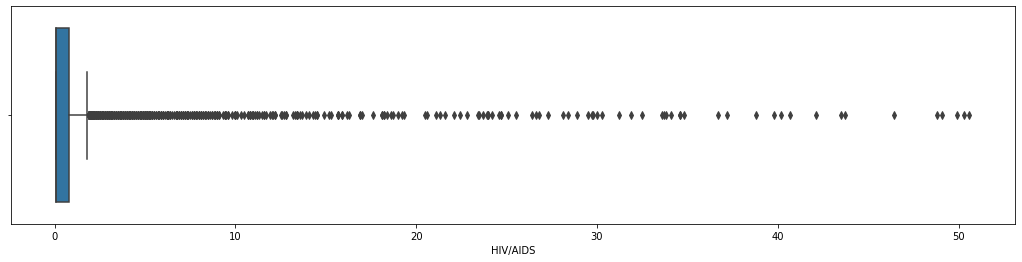

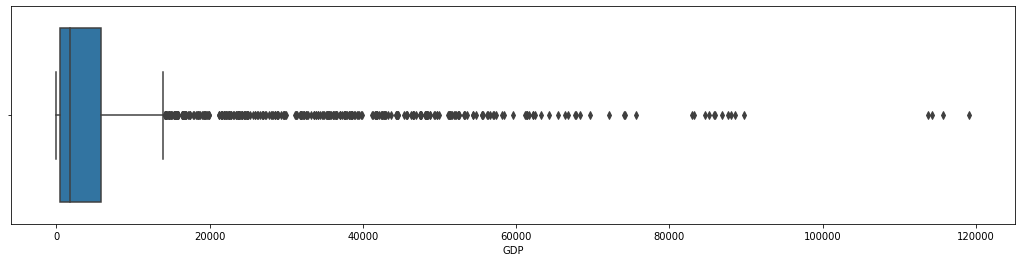

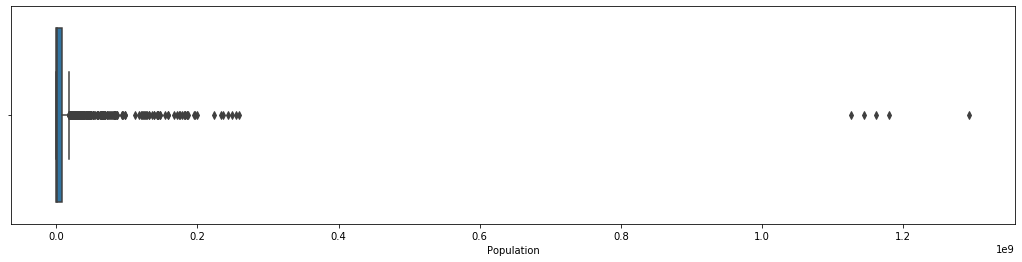

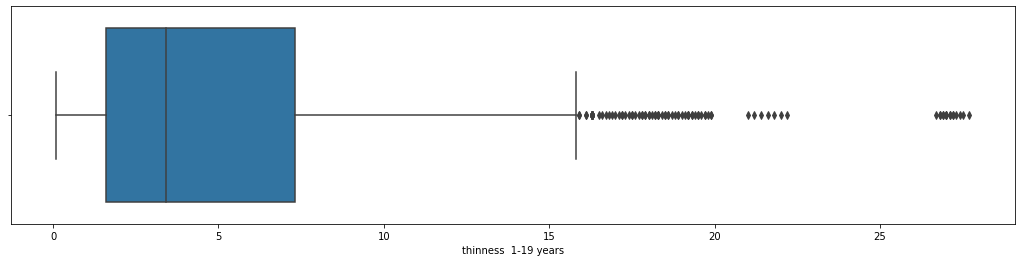

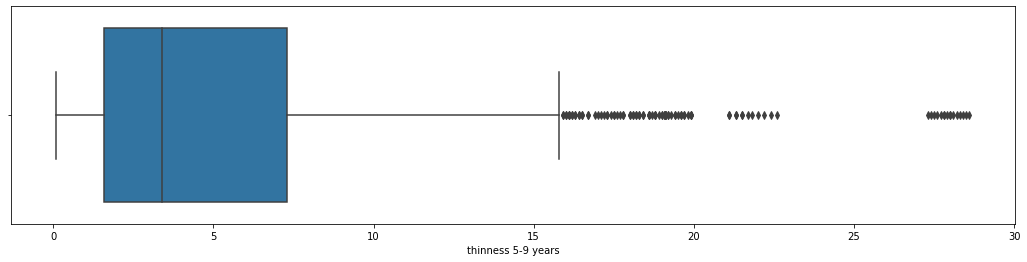

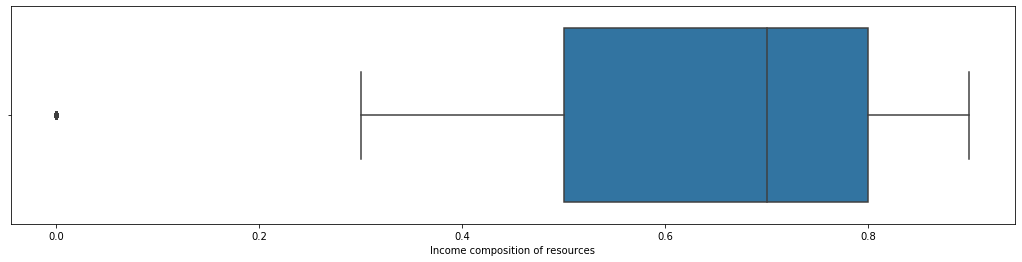

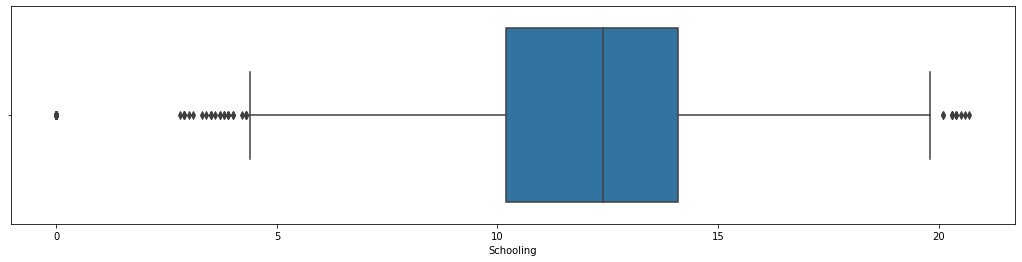

In [9]:
for i, col in enumerate(list(data.columns[3:22])):
    plt.figure(figsize=(18, 4))
    sns.boxplot(data[col])

The box plot shows that all the major columns have a few outliers, with many having a lot of them. The ones which
have a lot of outliers are: Measles, under five-deaths, HIV/AIDS, thinness data. The ones which have fewer outliers are: Schooling, Life expectancy, Adult Mortality, Alcohol, BMI, Polio, Diphtheria and Income composition.
    

# Handling Outliers using Winsorization

To replace the outliers, Winsorization is used. It replaces the outliers (extreme values) by lesser extreme values. Depending on the percentile passsed, it copies the extreme value by the percentile value defined. For example, consider a sorted array A = [-80, -6, 10, 13, 15, 19, 26, 28, 41, 58, 78, 85, 86, 89, 89, 91, 92, 100, 100, 1081]. The 10th percentile of this array lies between -80 and -6, and 90 percentile lies between 100 and 1081. If we winsorize this by 90%, -80 will be replaced with -6, and 1081 will be replaced with 100. 

winsorized_A = [-6, -6, 10, 13, 15, 19, 26, 28, 41, 58, 78, 85, 86, 89, 89, 91, 92, 100, 100, 100]



In [10]:
# initialising a new dataframe to store cleaned data
cleaned_data = data

Wisorization limits range is decided by looking at the Box Plot and number of estimated ouliers.

In [11]:
# Example Winsorization 
'''
1. Data is sorted
2. What is a percentile? => Example [1,2,3,4,5,6,7,8,9,10]: '1' is 10 percentile, '2' is 20 percentile
3. for values less than 10 percentile, all are copied as 1
4. for values less than 20 percentile, all are copied as 2, similarly.
'''

cleaned_data["Life expectancy"]= mstats.winsorize(data["Life expectancy"], limits=[0.01, 0.0])
cleaned_data["Adult Mortality"]= mstats.winsorize(data["Adult Mortality"], limits=[0.0, 0.05])
cleaned_data["infant deaths"]= mstats.winsorize(data["infant deaths"], limits=[0.0, 0.12])
cleaned_data["Alcohol"]= mstats.winsorize(data["Alcohol"], limits=[0.0, 0.01])
cleaned_data["percentage expenditure"]= mstats.winsorize(data["percentage expenditure"], limits=[0.0, 0.16])
cleaned_data["Hepatitis B"]= mstats.winsorize(data["Hepatitis B"], limits=[0.1, 0.0])
cleaned_data["Measles"]= mstats.winsorize(data["Measles"], limits=[0.0, 0.2])
cleaned_data["under-five deaths"]= mstats.winsorize(data["under-five deaths"], limits=[0.0, 0.15])
cleaned_data["Polio"]= mstats.winsorize(data["Polio"], limits=[0.10, 0.0])
cleaned_data["Total expenditure"]= mstats.winsorize(data["Total expenditure"], limits=[0.0, 0.12])
cleaned_data["Diphtheria"]= mstats.winsorize(data["Diphtheria"], limits=[0.13, 0.0])
cleaned_data["HIV/AIDS"]= mstats.winsorize(data["HIV/AIDS"], limits=[0.0, 0.20])
cleaned_data["thinness  1-19 years"]= mstats.winsorize(data["thinness  1-19 years"], limits=[0.0, 0.08])
cleaned_data["thinness 5-9 years"]= mstats.winsorize(data["thinness 5-9 years"], limits=[0.0, 0.08])
cleaned_data["Income composition of resources"]= mstats.winsorize(data["Income composition of resources"], limits=[0.05, 0.0])
cleaned_data["Schooling"]= mstats.winsorize(data["Schooling"], limits=[0.02, 0.08])


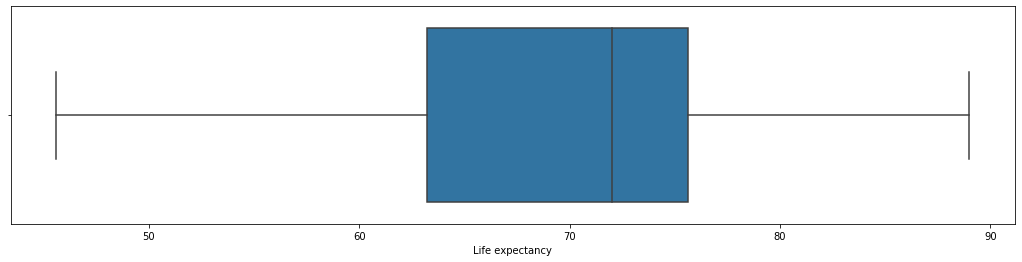

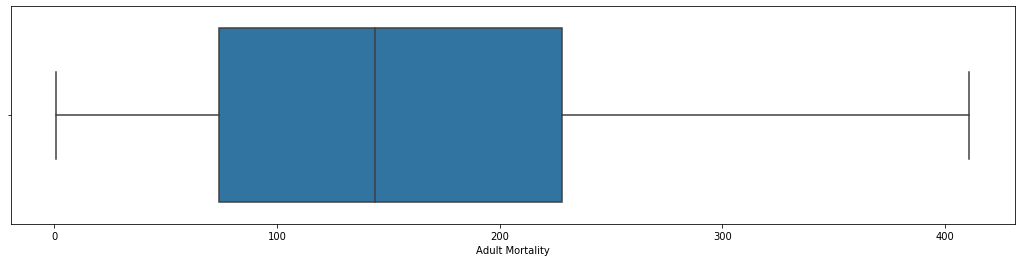

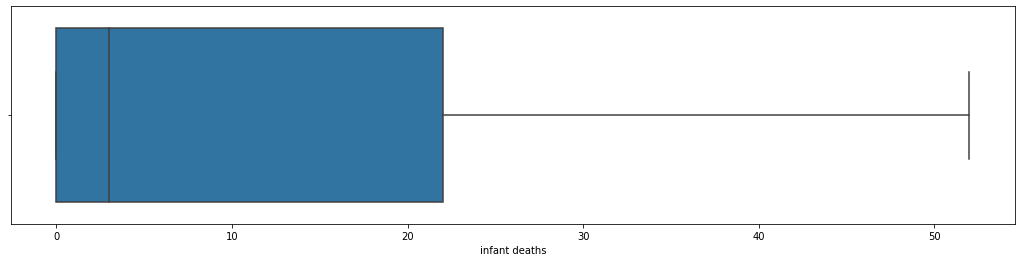

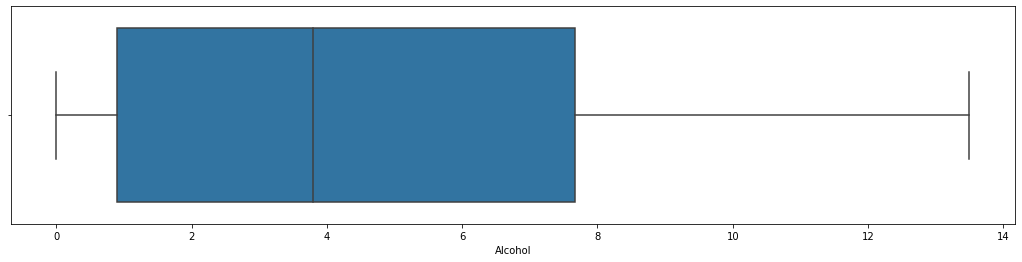

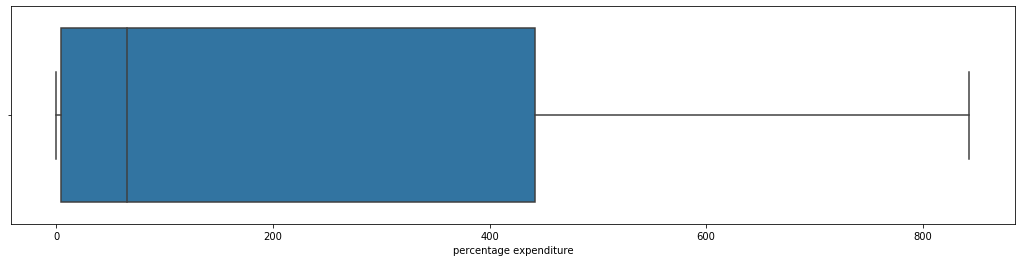

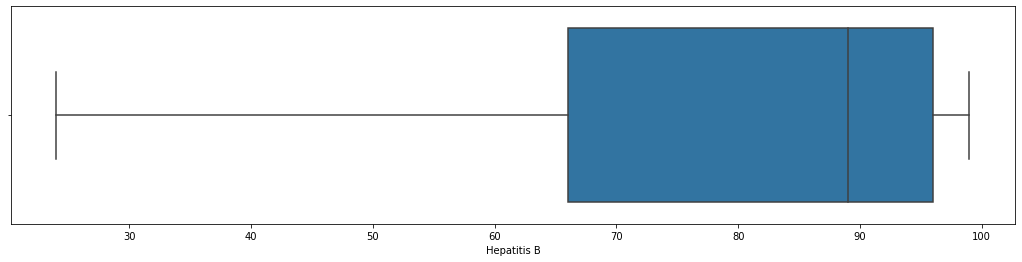

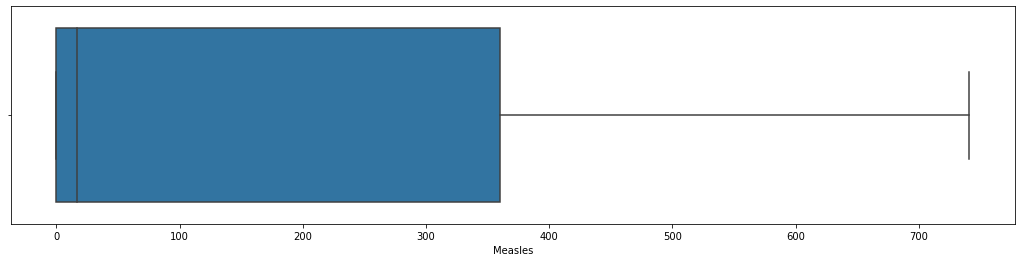

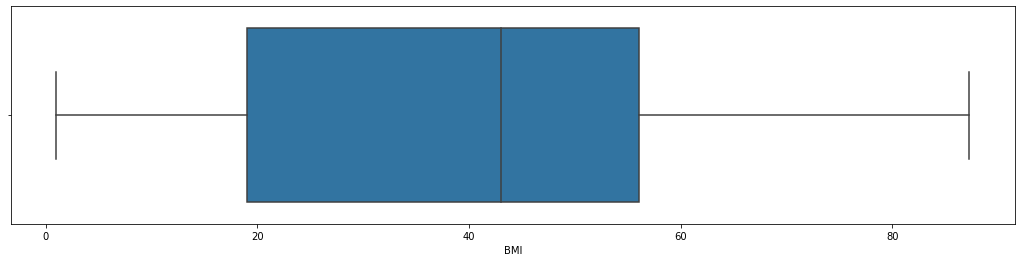

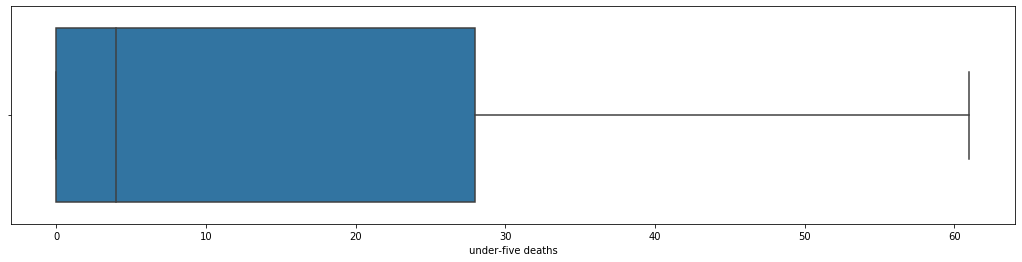

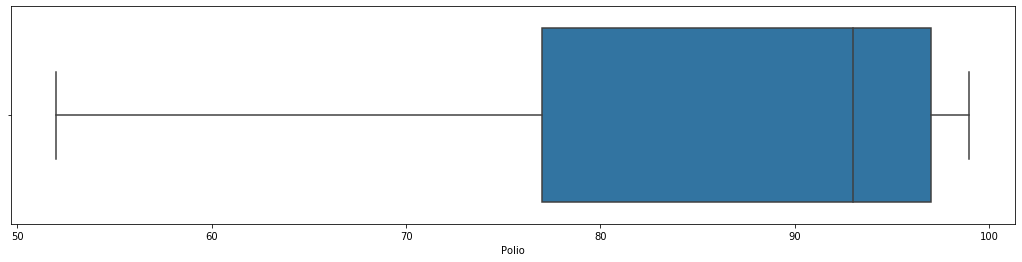

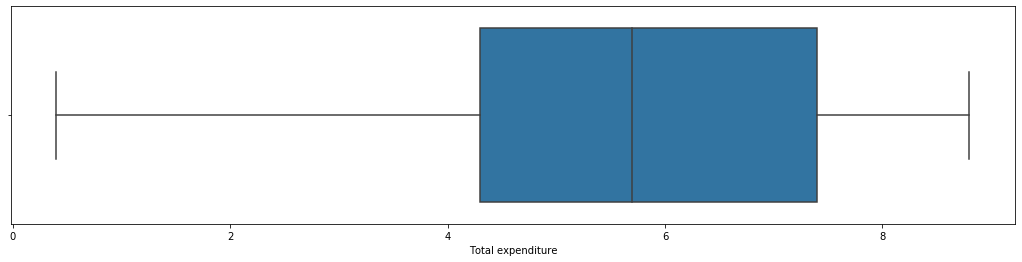

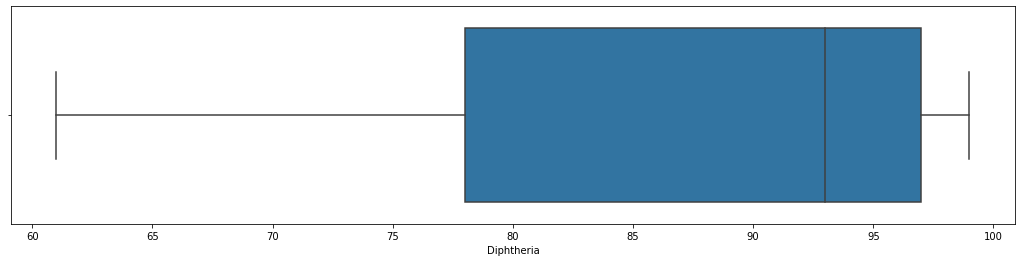

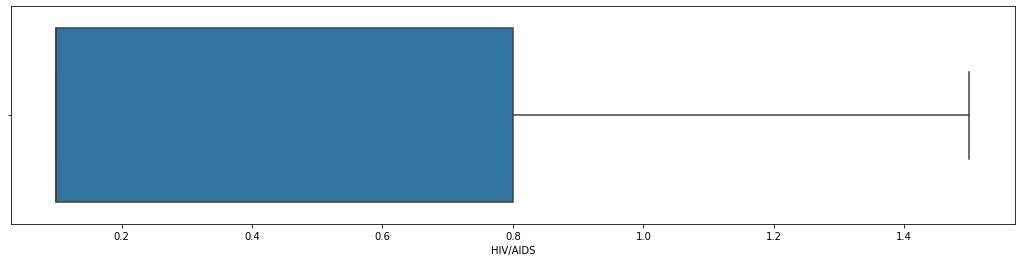

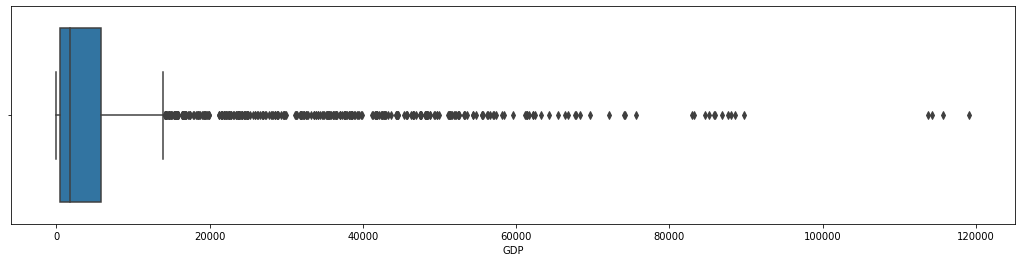

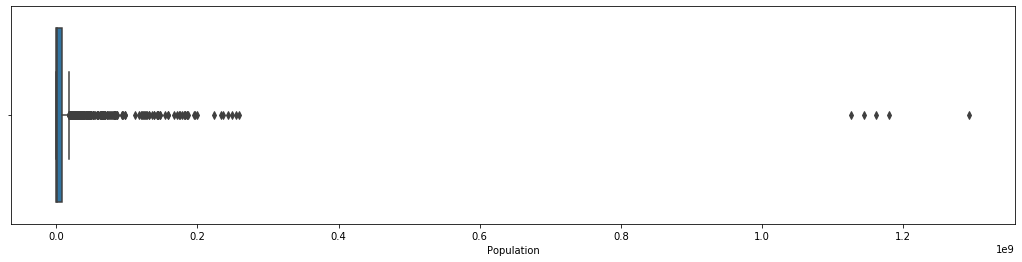

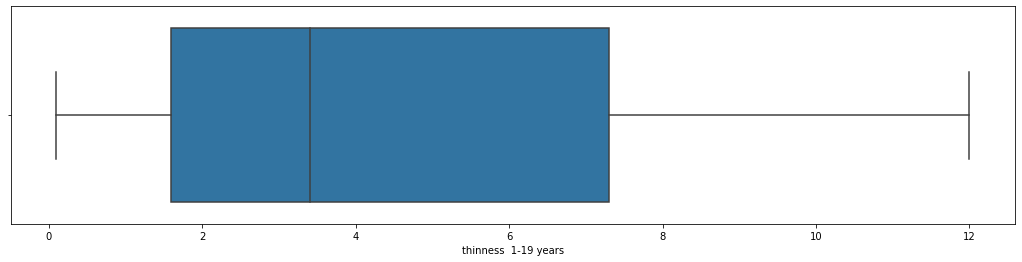

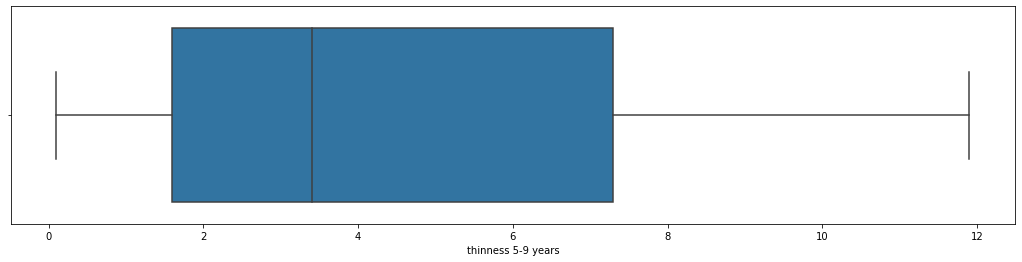

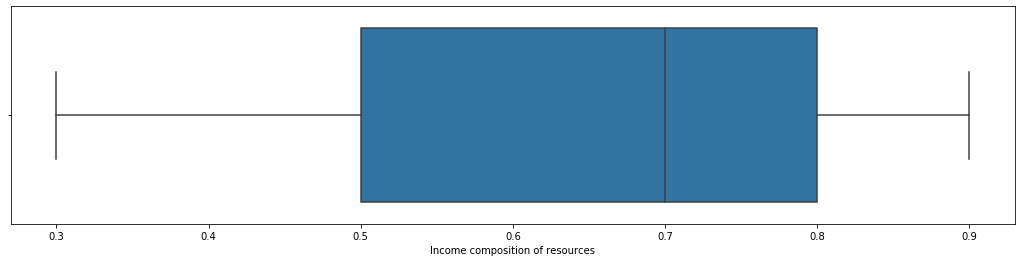

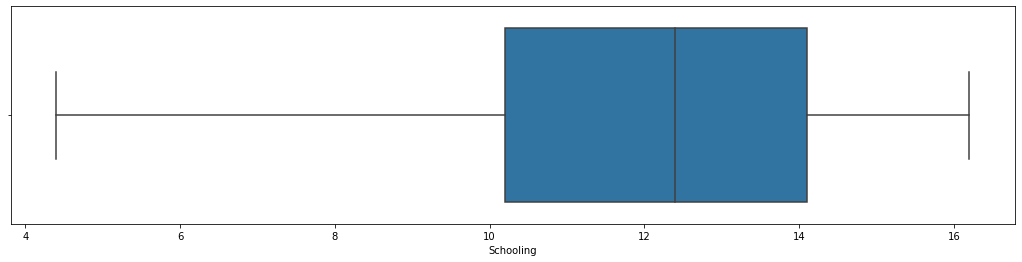

In [12]:
# Drawing Box Plots to check if the outliers have been removed (!!!!! IGNORE GDP, Population and Hepatitis B)
for i, col in enumerate(list(cleaned_data.columns[3:22])):
    plt.figure(figsize=(18, 4 ))
    sns.boxplot(cleaned_data[col])

As evident from the Box Plot figures, the whole data set has been cleaned. GDP, Population and Hepatitis B has too many values to fill and too many outliers, so cleaning operations are avoided on these columns and hence these will be avoided while analysing data.

In [13]:
# Saving file to CSV
cleaned_data.to_csv('cleaned_data_Winsorized.csv', index = False, header=True)
data = cleaned_data

# DATA ANALYSIS

In [14]:
# Describing the key statistics from the data
data.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2794.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2516.000000,2.286000e+03,2938.000000,2938.000000,2938.000000,2938.000000
mean,2007.518720,69.248673,160.326753,13.291014,4.592138,247.424677,77.422334,203.118108,38.020150,16.695371,85.382914,5.720252,86.378148,0.469197,7413.645707,1.275338e+07,4.608850,4.605514,0.648060,11.933696
std,4.613841,9.462111,111.780974,18.373904,4.013310,316.804336,24.959987,296.980200,20.175077,22.638913,15.409342,2.093226,13.228446,0.569172,14212.727754,6.101210e+07,3.608613,3.600295,0.176789,2.975684
min,2000.000000,45.600000,1.000000,0.000000,0.000000,0.000000,24.000000,0.000000,1.000000,0.000000,52.000000,0.400000,61.000000,0.100000,1.700000,3.400000e+01,0.100000,0.100000,0.300000,4.400000
25%,2004.000000,63.200000,74.000000,0.000000,0.900000,4.700000,66.000000,0.000000,19.000000,0.000000,77.000000,4.300000,78.000000,0.100000,458.900000,1.957932e+05,1.600000,1.600000,0.500000,10.200000
50%,2008.000000,72.000000,144.000000,3.000000,3.800000,64.950000,89.000000,17.000000,43.000000,4.000000,93.000000,5.700000,93.000000,0.100000,1727.600000,1.386542e+06,3.400000,3.400000,0.700000,12.400000
75%,2012.000000,75.600000,228.000000,22.000000,7.675000,441.500000,96.000000,360.250000,56.100000,28.000000,97.000000,7.400000,97.000000,0.800000,5855.325000,7.420359e+06,7.300000,7.300000,0.800000,14.100000
max,2015.000000,89.000000,411.000000,52.000000,13.500000,843.100000,99.000000,741.000000,87.300000,61.000000,99.000000,8.800000,99.000000,1.500000,119172.700000,1.293859e+09,12.000000,11.900000,0.900000,16.200000


# Using Correlation to find information from data

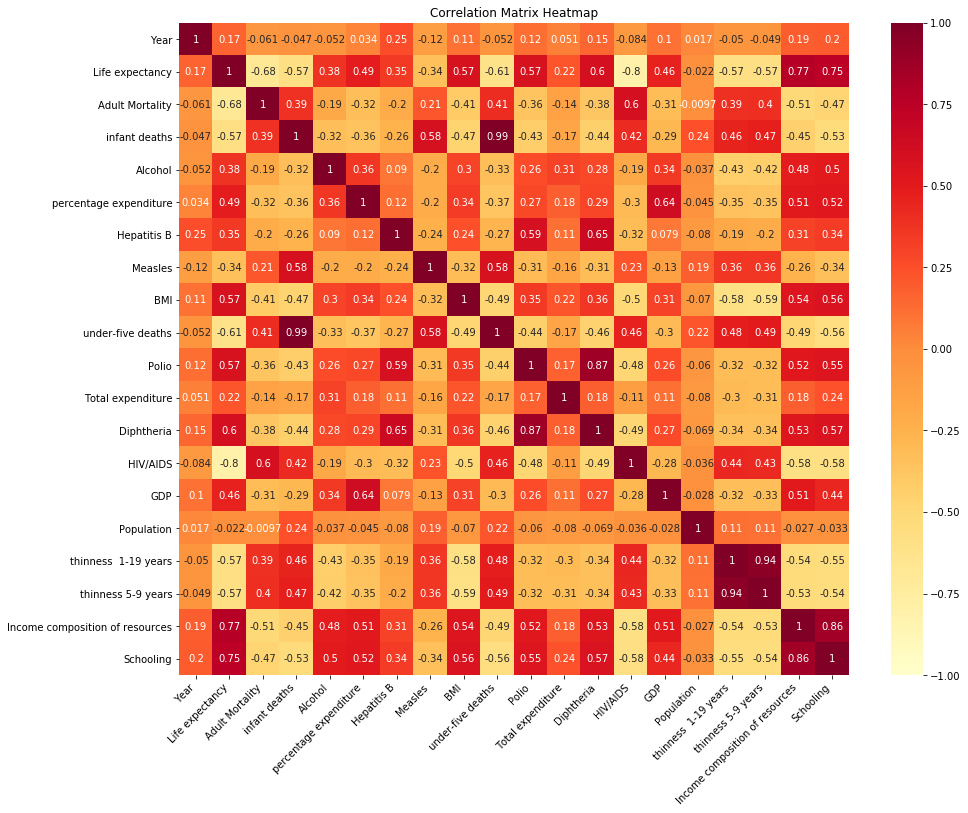

In [15]:
# Generating a correlation matrix for all the continuos and discrete values
plt.figure(figsize=(15,12))
# Using Seaborn library
ax = sns.heatmap(data[data.columns].corr(), annot=True, fmt='.2g', vmin=-1, vmax=1, center=0, cmap ="YlOrRd")
# Configuring the x ticks and labels
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
plt.title('Correlation Matrix Heatmap')
plt.show()

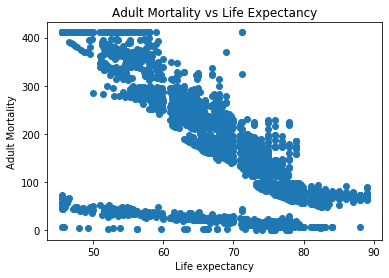

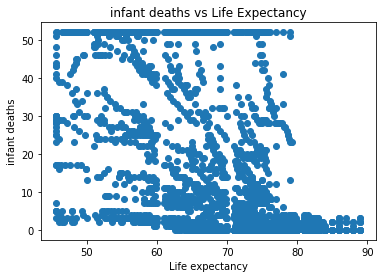

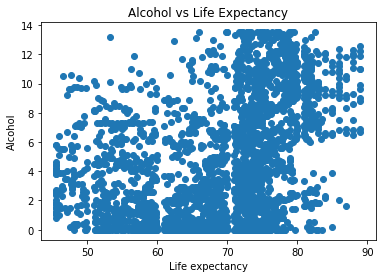

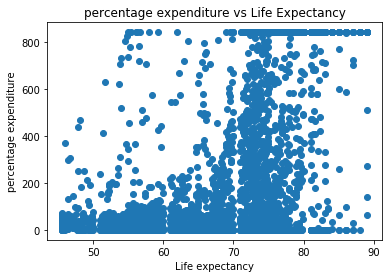

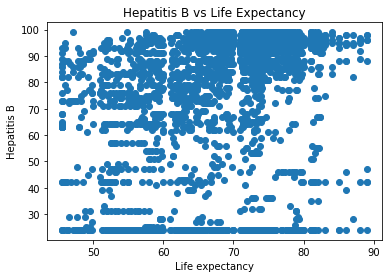

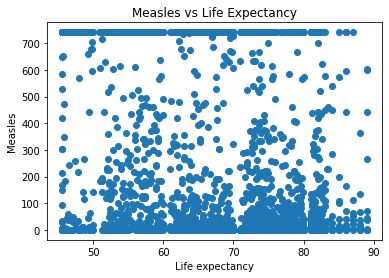

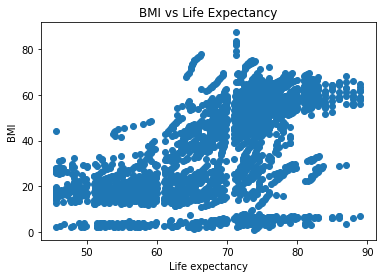

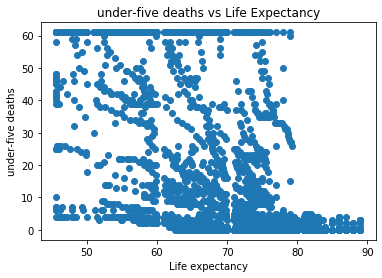

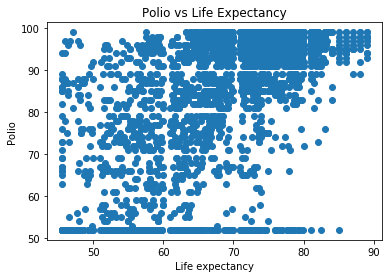

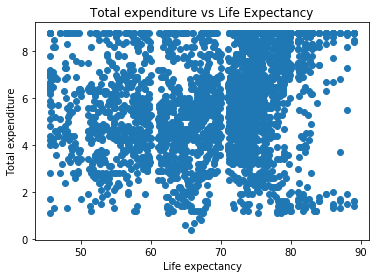

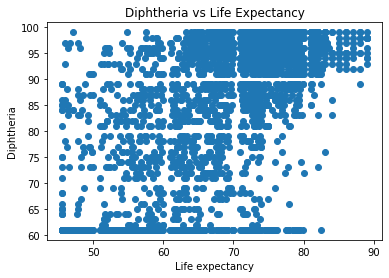

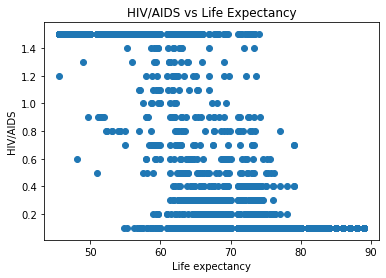

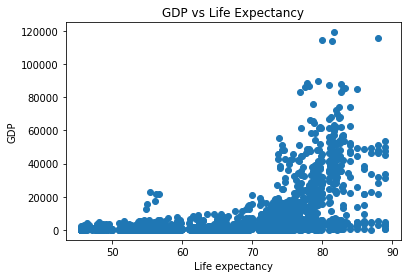

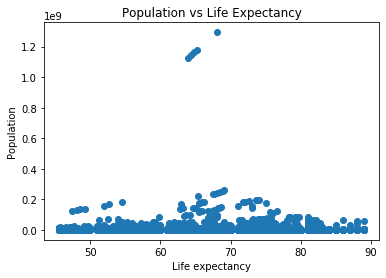

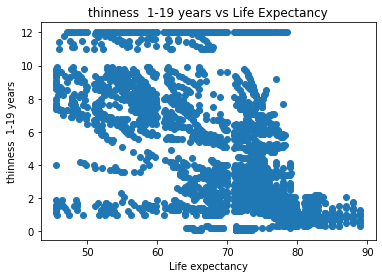

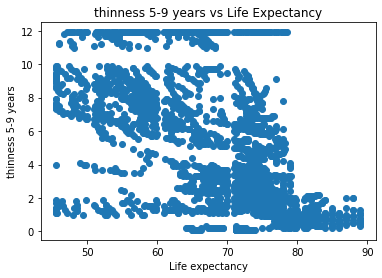

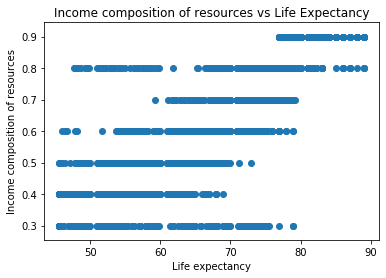

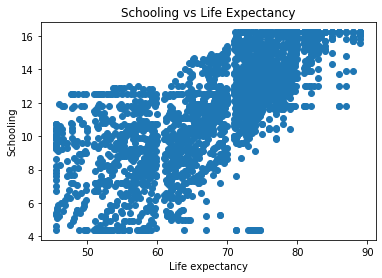

In [16]:
# Life Expectancy vs all other columns Scatter Plot
for i in list(data.columns[4:len(list(data.columns))]):
    plt.title(i + ' vs Life Expectancy')
    plt.scatter(data["Life expectancy"], data[i])
    plt.xlabel('Life expectancy')
    plt.ylabel(i)
    plt.show()


Observing the Scatter Plots above, following initial observations can be made:
1. Schooling impacts Life Expectancy positively.
2. Adult Mortality has a negative correlation with Life Expectancy, which it should be as they both are opposite of each other.
3. Thinness properties, Polio and HIV strongly decreases Life Expectancy.



Plotting a Frequency Distribution can extract a few things out of this data.

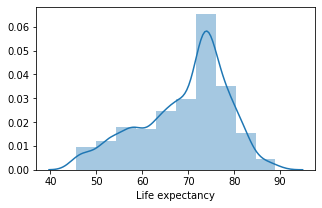

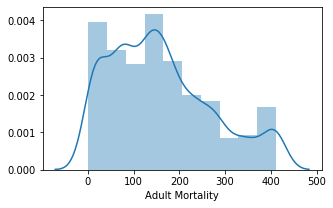

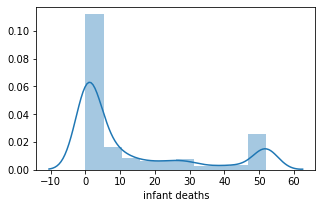

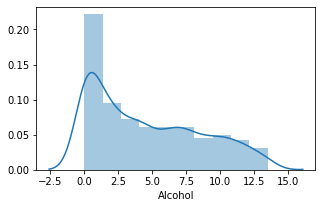

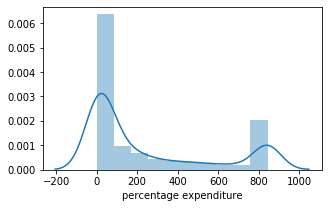

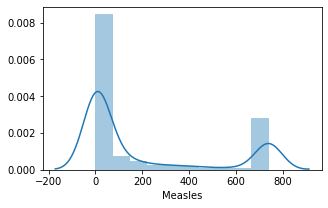

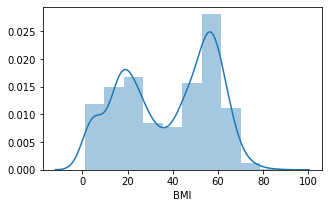

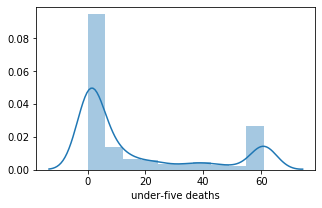

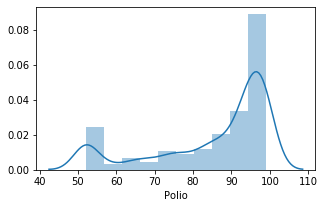

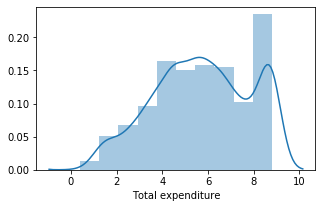

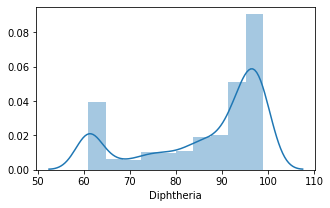

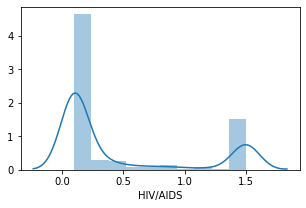

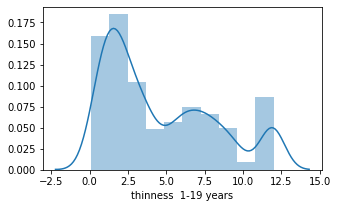

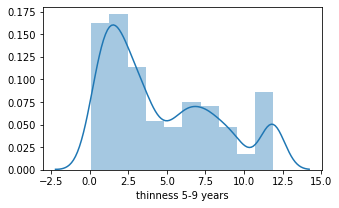

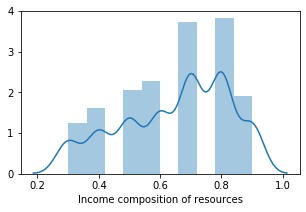

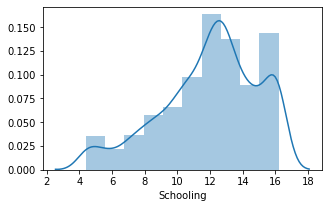

In [17]:
# Plotting a frequency distribution histogram for all columns
temp = data
temp = temp.drop(columns=['Population', 'GDP', 'Hepatitis B'])
for i in list(temp.columns[3:len(list(temp.columns))]):
    plt.figure(figsize=[5,3])
    sns.distplot(temp[i], bins = 10)

Frequency Distribution doesn't provide any major information from the data. 

# Developed vs Developing Countries 

Next, we have divided the data using 'Status' column into developed countries data and developing countries data. This comparitive study is conducted below.

Text(0.5, 1.0, 'Developed/Developing country')

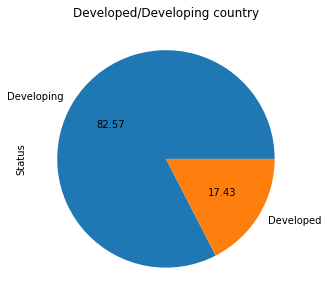

In [18]:
plt.figure(figsize = (5,5))
data['Status'].value_counts().plot(kind='pie', autopct='%.2f')
plt.title('Developed/Developing country')

We have 82.57 % Developing Countries in the data and 17.43 % Developed Countries. Moving on we can compare all the variables based on their Country Status. The mean is calculated to give a rough idea about how overall variables compare with respect to their country status. 

In [19]:
grouped_by_status = data.groupby('Status')
mean_status = grouped_by_status[data.columns].agg(['mean'])
mean_status.columns = [col[0] for col in mean_status.columns]
mean_status

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Status,,,,,,,,,,,,,,,,,,,,
Developed,2007.500000,79.197852,79.685547,1.494141,9.559766,522.884375,84.661458,120.072266,51.803906,1.810547,94.324219,6.950586,94.492188,0.100000,22053.386607,6.830053e+06,1.320703,1.296680,0.846875,15.003320
Developing,2007.522671,67.148928,177.345837,15.780709,3.543735,189.289736,76.268880,220.644683,35.111129,19.836768,83.495878,5.460594,84.665705,0.547115,4242.173791,1.407108e+07,5.302803,5.303833,0.606101,11.285862


This can be visualised using the Grouped Bar plot, a few columns needs to dropped as they have a irregular scale of measurement than other columns.

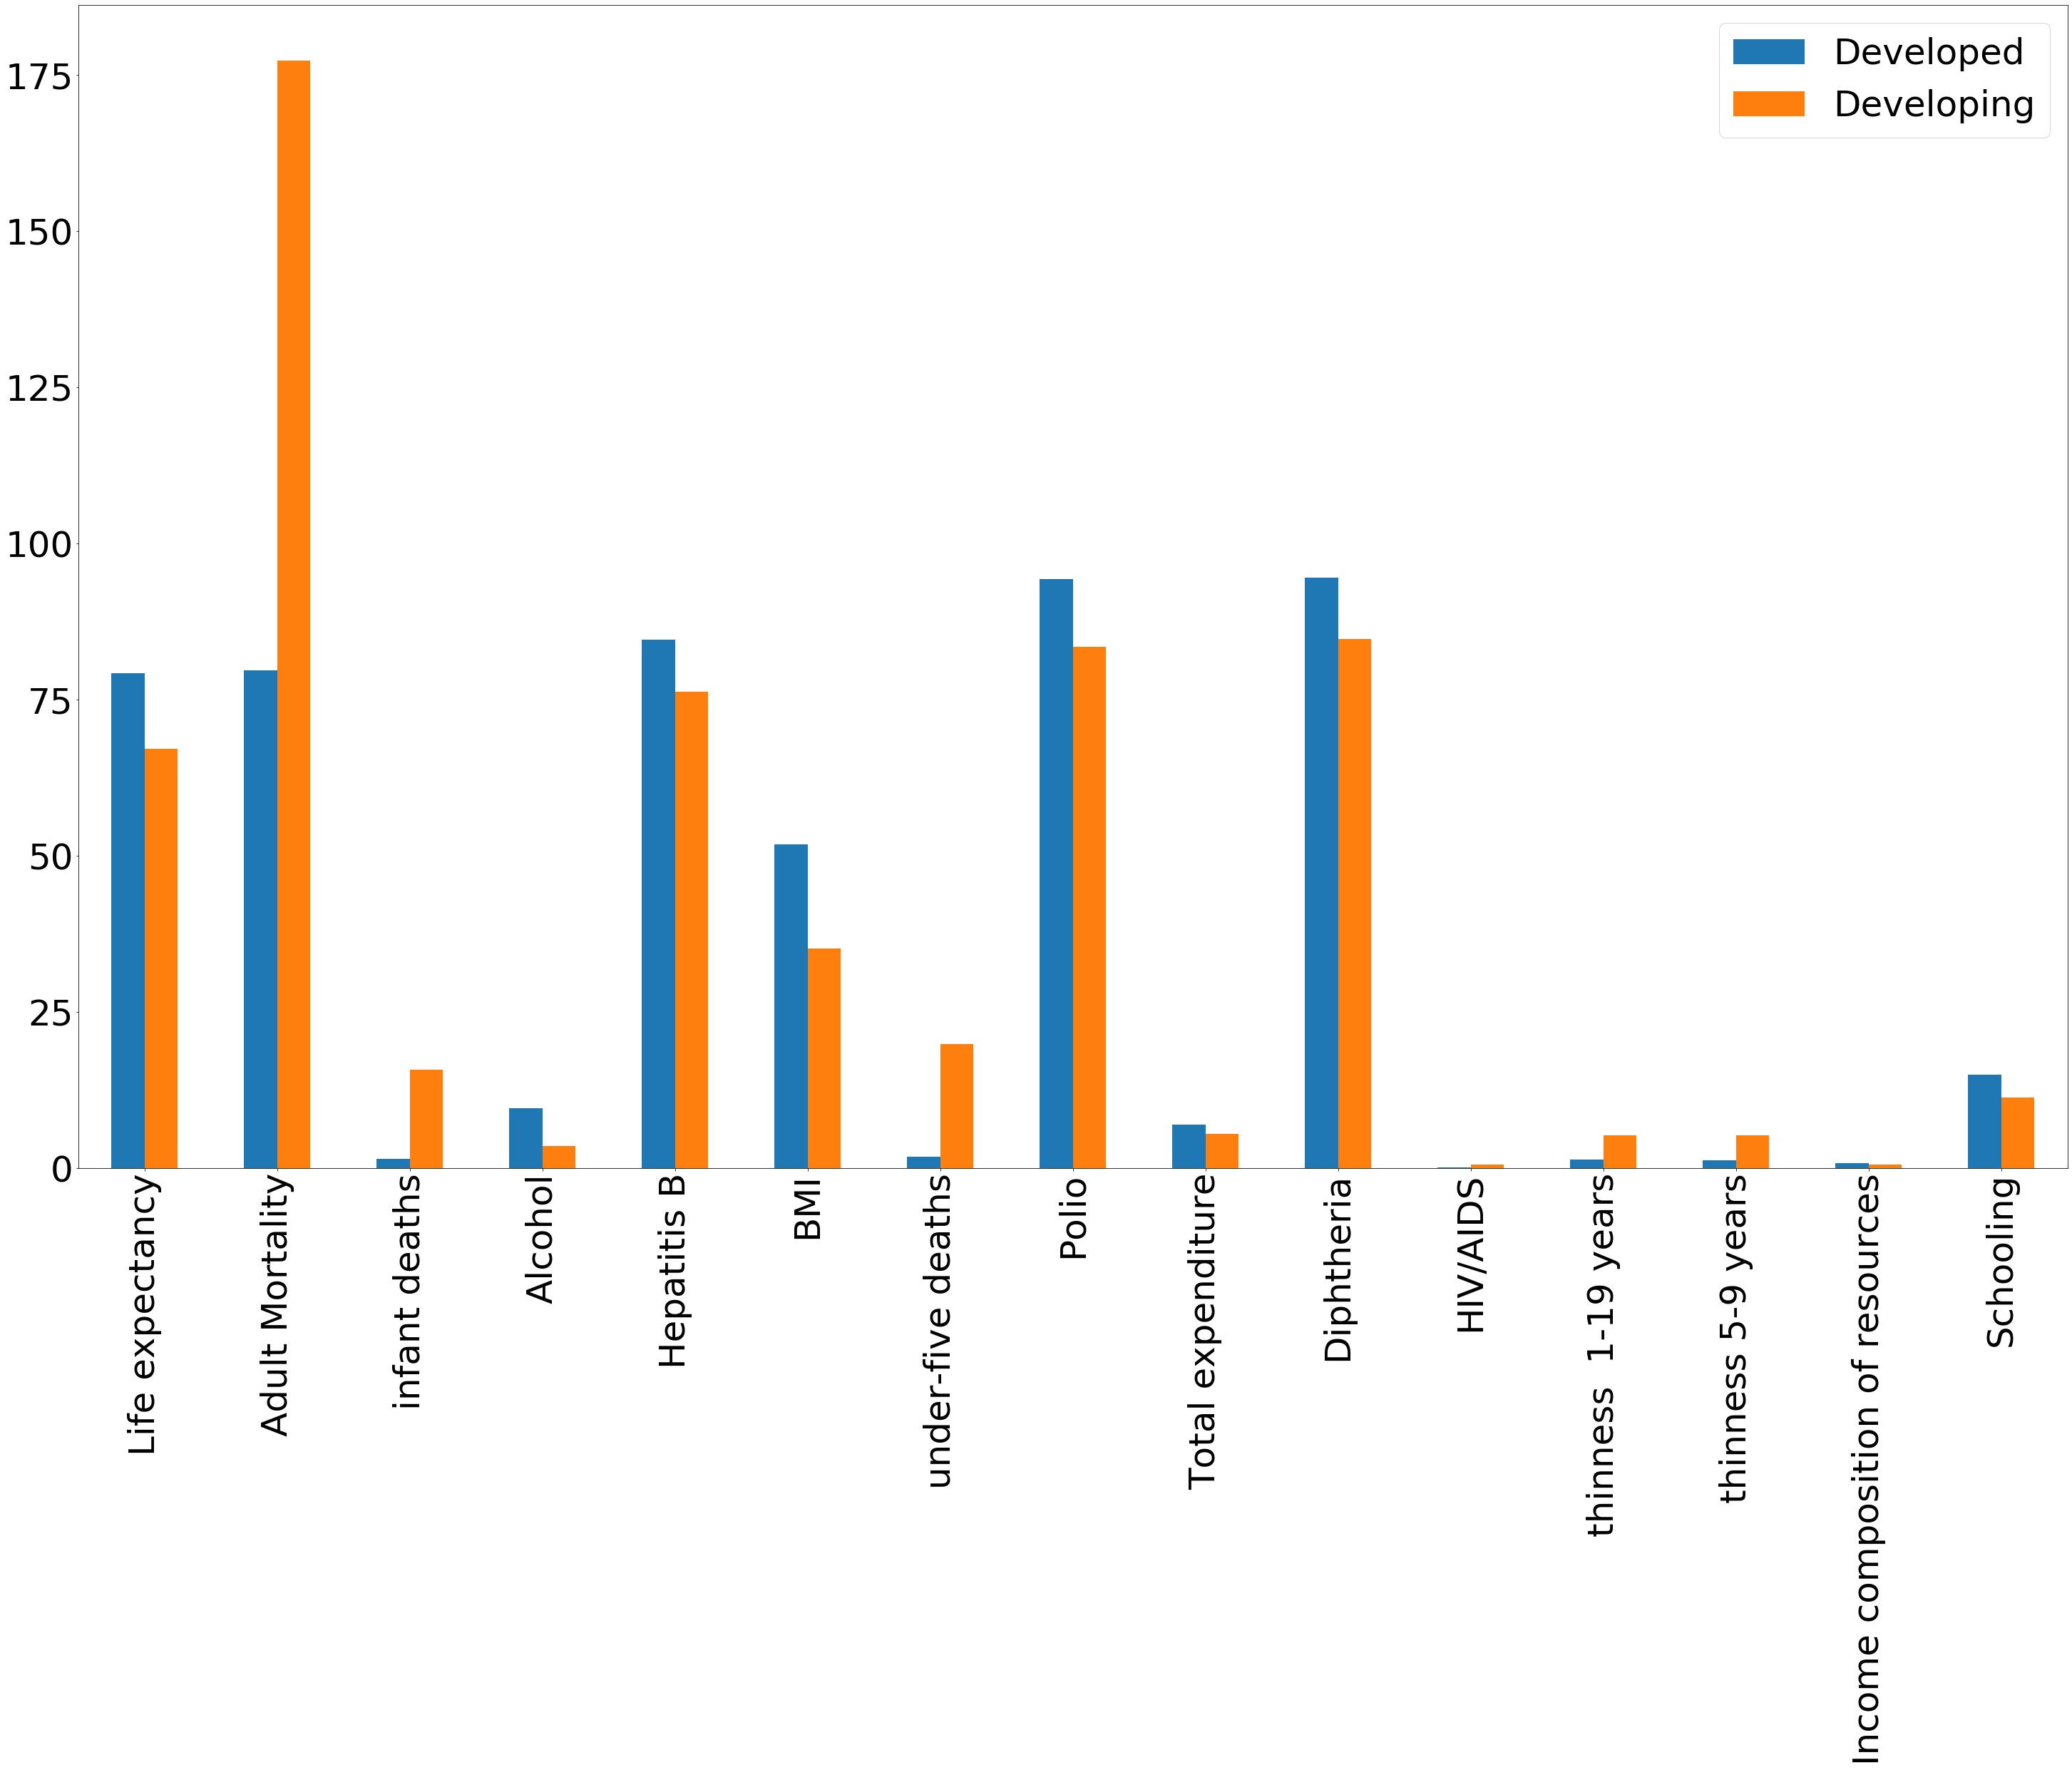

In [20]:
mean_status.drop(columns=['Population', 'GDP', 'percentage expenditure', 'Measles'], inplace = True)

# a is just a temporary variable
a = mean_status

developed = list(a.loc['Developed' , 'Life expectancy':'Schooling' ])
developing = list(a.loc['Developing' , 'Life expectancy':'Schooling' ])
index = list(a.columns[1:20])
df = pd.DataFrame({'Developed': developed,
                   'Developing': developing}, index=index)


ax = df.plot.bar(figsize=(50,30))
ax.tick_params(axis='both', which='major', labelsize=50)
ax.legend(loc = 1, fontsize = 50 )

The Grouped Bar Plot gives us interesting observations which were expected:
1. Life Expectancy, Alcohol Consumption, BMI, Schooling is more in Developed Nations.
2. Adult Mortality, infant deaths, thinness, is greated in Developing Nations.

## Year by Year Analysis

Next we have a year by year analysis of all the columns along with status of each country. We have created a custom function, which helps us to research this area using visualisation.

In [21]:
def year_status_display(feature):
    '''
        This function creates a line plot for a particular 'feature'
        and displays the line plot by year from 2000 to 2016
    '''
    
    # Grouping the data by Status first and then by year
    developed = []
    developing = []
    grouped_by_status = data.groupby('Status')
    for name1, group in grouped_by_status:
        grouped_by_year = group.groupby("Year")
        # find mean of life expectancy for each year
        if (name1 == 'Developed'):
            developed = list(grouped_by_year[feature].mean())
        else:
            developing = list(grouped_by_year[feature].mean())
    
    # Plotting a line plot
    plt.figure(figsize=(8,5))
    plt.scatter(np.flip(data['Year'].unique(), 0), developed)
    plt.scatter(np.flip(data['Year'].unique(), 0), developing)
    
    plt.plot(np.flip(data['Year'].unique(), 0), developed)
    plt.plot(np.flip(data['Year'].unique(), 0), developing)
    plt.legend(['Developed', 'Developing'], loc = 0, fontsize = 'x-large' )
    plt.title(feature + ' by Year')

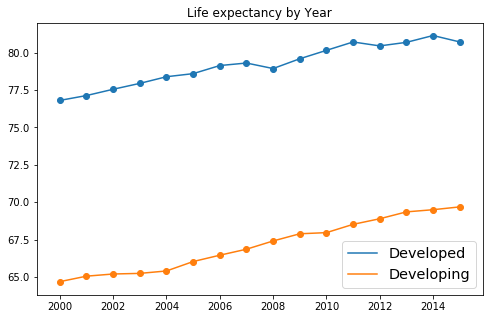

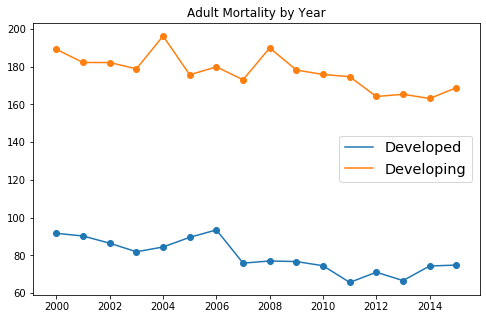

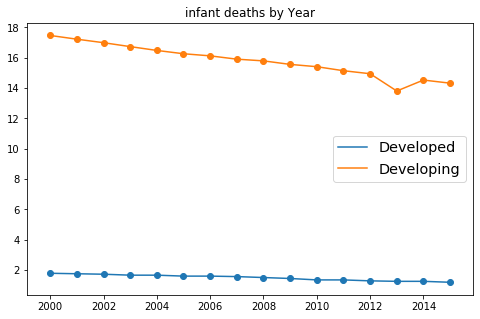

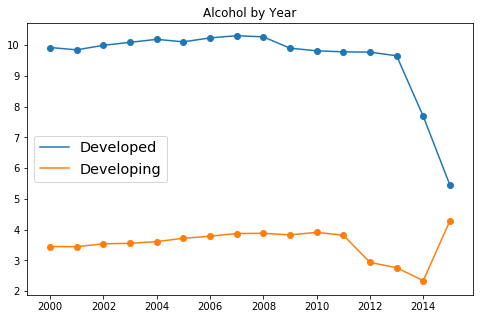

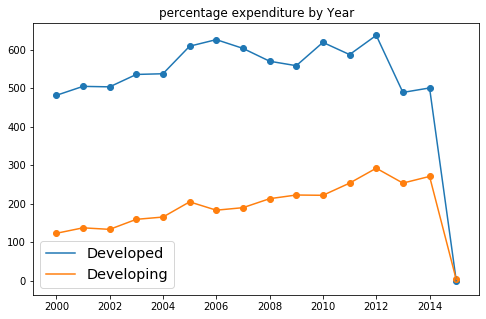

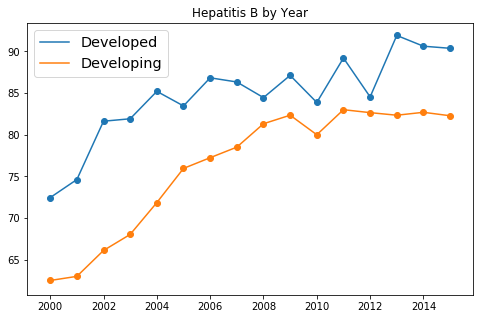

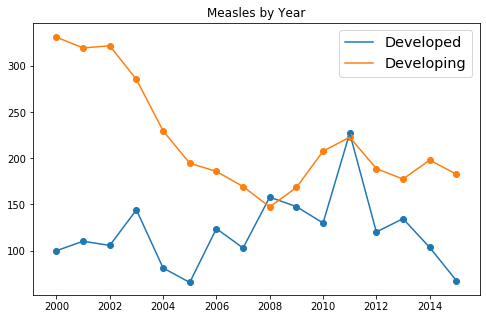

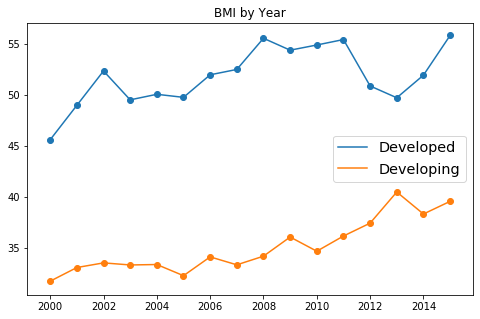

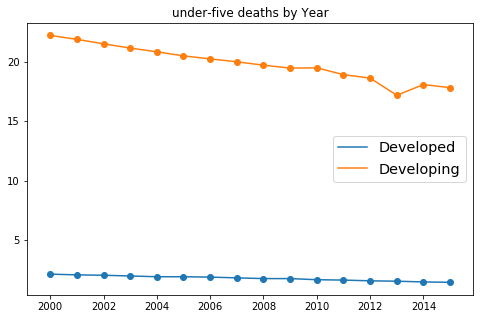

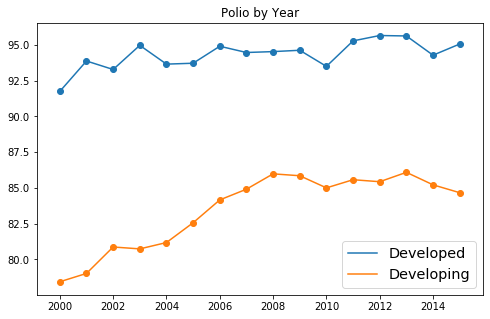

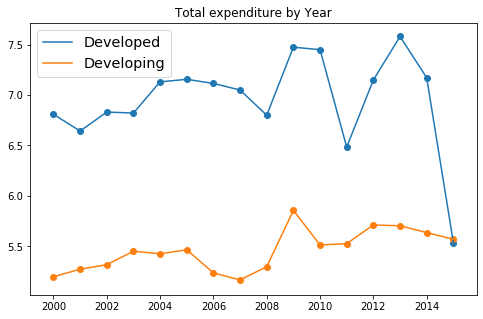

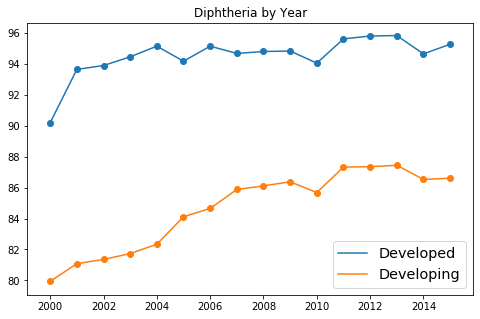

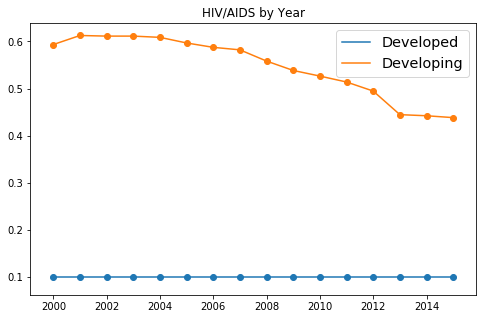

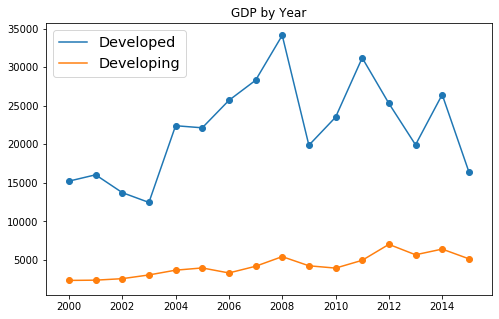

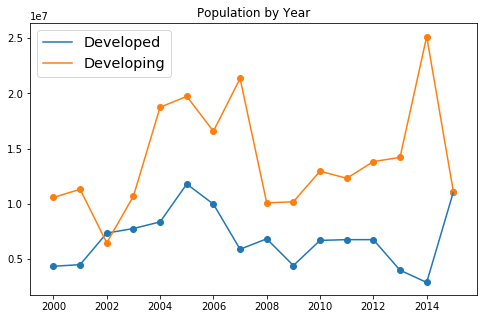

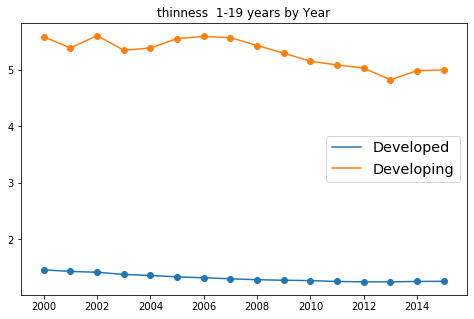

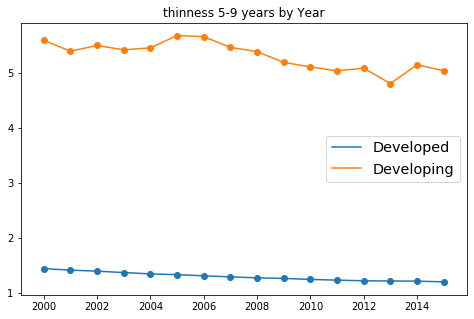

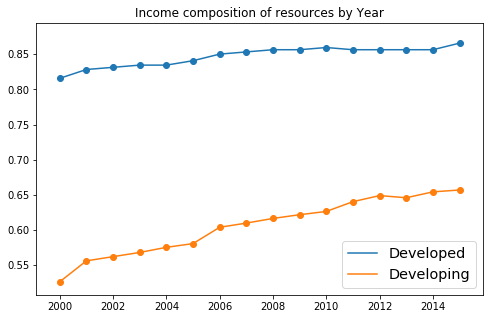

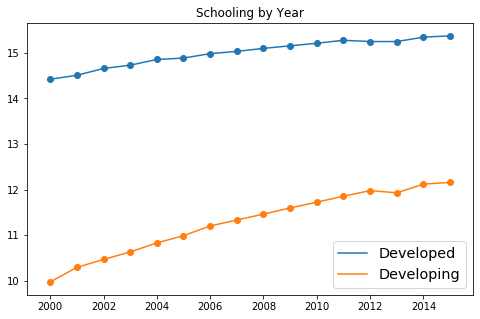

In [22]:
# Drawing custom line plots for all the columns
for i in list(data.columns[3:len(list(data.columns))]):
    year_status_display(i)

These line plots are helpful in understanding how Developing and Developed Countries have evolved over the year with respect to each feature. Life Expectancy has increased for both, infant deaths have decreased, BMI has increased, Income and Schooling has also increased for both. More insights are shared in the report.

# Schooling vs Life Expectancy

We have studied Schooling and Life Expectancy in a bit more detail in the section below. This is done to answer this question: 'Does a longer schooling period affect the life expectancy?'

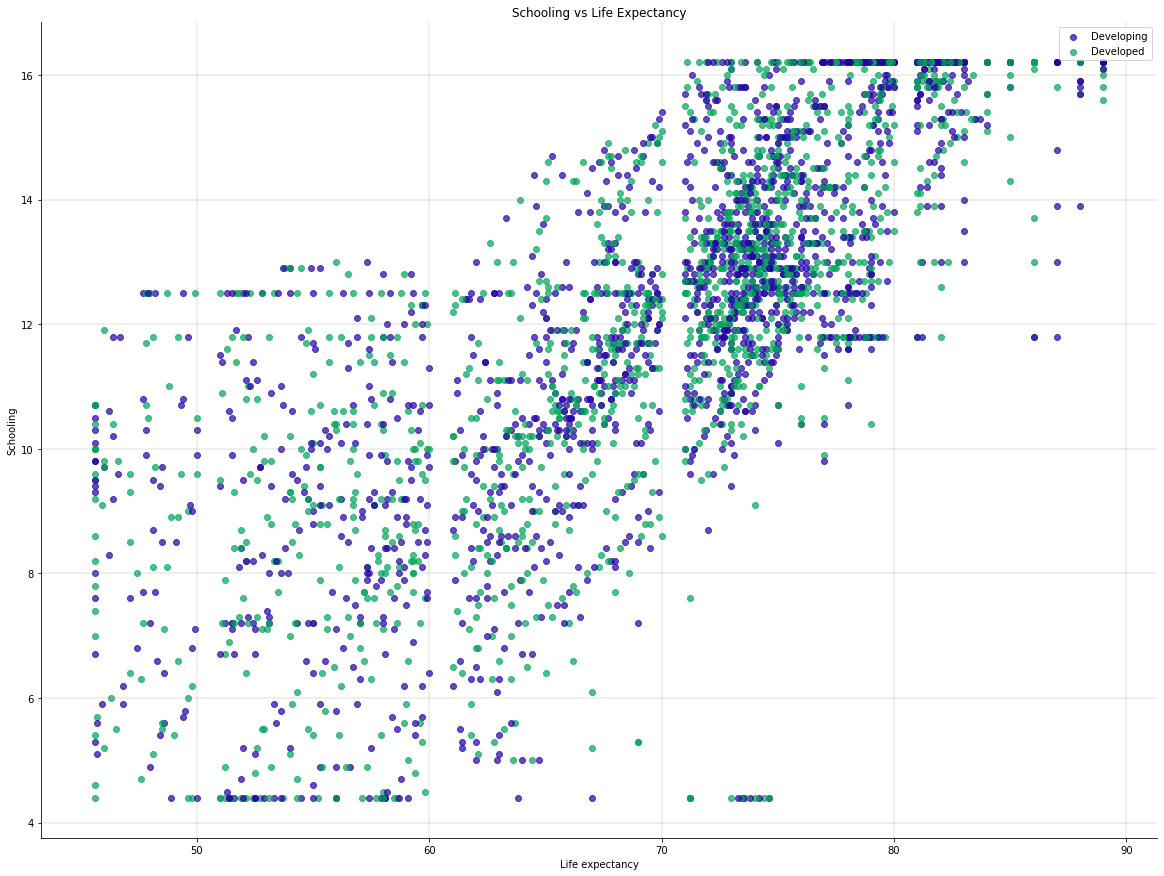

In [23]:
'''
    SCATTER PLOT
    
    SCHOOLING VS LIFE EXPECTANCY BASED ON DEVELOPING AND DEVELOPED NATION
'''

developed = data[['Country', 'Status','Life expectancy', 'Alcohol']].loc[data['Status']=='Developed']
developing = data[['Country', 'Status','Life expectancy', 'Alcohol']].loc[data['Status']=='Developing']


#converting original (numerical) labels into categorical labels
categories = data['Status']
fig, ax = plt.subplots(figsize=(20, 15))

#assigns a color to each data point
colors = ['#2300A8', '#00A658']

#iterates through the dataset plotting each data point and assigning it its corresponding color and label
for i in range(len(data)):
    plt.scatter(data['Life expectancy'].iloc[i], data['Schooling'].iloc[i], alpha=0.70, color = colors[i%len(colors)], label=categories.iloc[i])
    
#adds a title and axes labels
ax.set_title('Schooling vs Life Expectancy')
ax.set_ylabel('Schooling')
ax.set_xlabel('Life expectancy')

#removing top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#adds major gridlines
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=1)

ax.legend(categories.unique())

plt.show()

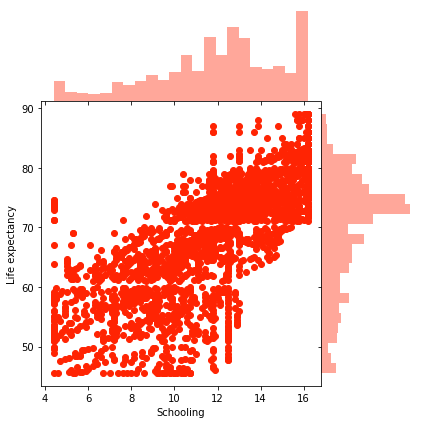

In [24]:
sns.jointplot("Schooling", "Life expectancy",  data=data, kind="scatter",
              space=0, color="#FF2403", ratio=3)
plt.show()

[41.05630358]
[[2.35449487]]


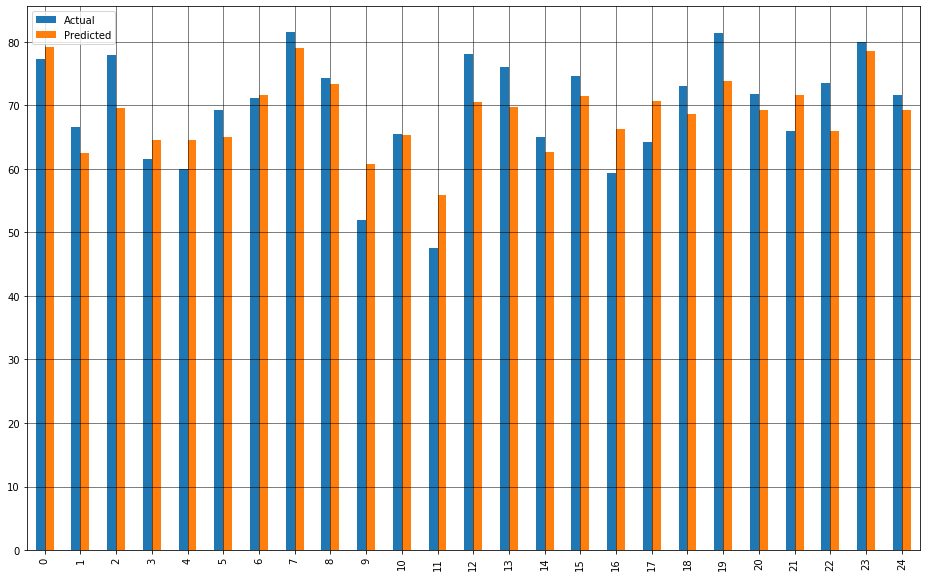

In [25]:
'''
    IMPLEMENTING A LINEAR REGRESSION MODEL ON SCHOOL VS LIFE EXPECTANCY
'''
data['Schooling'] = data['Schooling'].fillna(0)
df = data.apply (pd.to_numeric, errors='coerce')
df = df.dropna()

#putting our columns into variables for training

X = data['Schooling'].values.reshape(-1,1)
y = data['Life expectancy'].values.reshape(-1,1)

#Splitting training and testing data to a 80/20 respectively

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Regressor = LinearRegression()  
Regressor.fit(X_train, y_train) #training the algorithm

print(Regressor.intercept_)
print(Regressor.coef_)

Y_prediction = Regressor.predict(X_test)

df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': Y_prediction.flatten()})

df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [26]:
data = pd.read_csv("cleaned_data_Winsorized.csv")

# Investigating How to Improve Children Health Outcomes

In this analysis, we will investigate which factors have the most significant impact on a child's health. We will then make inferences on which factors countries can optimise to improve the health of children in a country. 

# Preventing Redundant Analysis

The markers related to children health in the dataset are thinness 5-9 years (%), thinness 1-19 years (%), HIV/AIDS (deaths per 1000 live births 0-4 years), under-five deaths (per 1000 population), infant deaths (per 1000 population).

_Thinness 5-9 years_ and _thinness 1-19 years_ as well as _under-five deaths_ and _infant deaths_ are very similar. Before we proceed with the investigation, we must see whether they are sufficiently similar to ommit one in each pair to prevent redundant analysis.

## Visualisations 

Under-five deaths vs infant deaths and thinness 5-9 years vs thinness 1-19 years.

Visualisation will help us see roughly if those metrics are very similar.

Text(0, 0.5, 'Thinness 1-19 years')

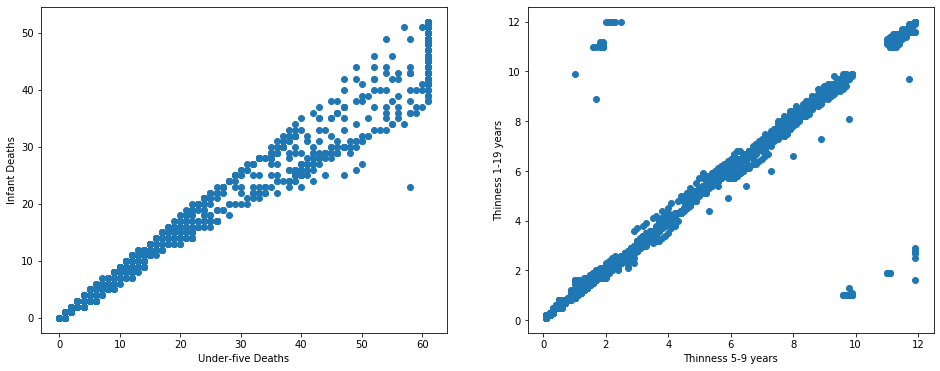

In [27]:
# Creating two subplots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Assigning under-five deaths and infants to first subplot
ax1.scatter(data["under-five deaths"], data["infant deaths"], label="Deaths")
ax1.set_xlabel("Under-five Deaths")
ax1.set_ylabel("Infant Deaths")

# Assigning thinness 5-9 years and thinness 1-19 years to second subplot
ax2.scatter(data["thinness 5-9 years"], data['thinness  1-19 years'], label="Thinness")
ax2.set_xlabel("Thinness 5-9 years")
ax2.set_ylabel("Thinness 1-19 years")

We can visually see that _Under-five deaths_ and _infant deaths_ as well as _thinness 5-9_ and _thinness 1-19_ are very similar. To get a more conrete idea, we will calculate their correlations. 

### Pearson's Correlation 

_Under-five deaths_ correlation with _infant deaths_ and _thinness 5-9 years_ correlation with _thinness 1-19 years_.

This will help us see if these metrics are sufficiently strongly correlated to use them interchangable. 

In [28]:
# Calculating correlation coefficient between under-five deaths and infant deaths
corr, _ = stats.pearsonr(data["under-five deaths"], data["infant deaths"])
print('Persons correlation between under-five deaths and infant deaths: %.3f' % corr)

# Calculating correlation coefficient between thinness 5-9 and thinness 1-19 years
corr, _ = stats.pearsonr(data["thinness 5-9 years"], data["thinness  1-19 years"])
print('Persons correlation between thinness 5-9 years and thinness 1-19 years: %.3f' % corr)

Persons correlation between under-five deaths and infant deaths: 0.992
Persons correlation between thinness 5-9 years and thinness 1-19 years: 0.942


Because under-five deaths and infant deaths as well as thinness 5-9 years and thinness 1-19 years are very strongly correlated, we can safely ommit one in each pair in our analysis to prevent redundancy. We will select **under-five deaths** and **thinness 1-19 years** because they cover a larger age range.

# Key Factors

To perform our analysis, we need to isolate which factors have the strongest impact on a child's health. The selected metrics related to a child's health in the dataset are: 

We must isolate which factors impact the above metrics the strongest. An easy way to do that is to look at a correlation heatmap. Only the factors with a sufficiently high correlation with child health outcomes will be investigated further. 

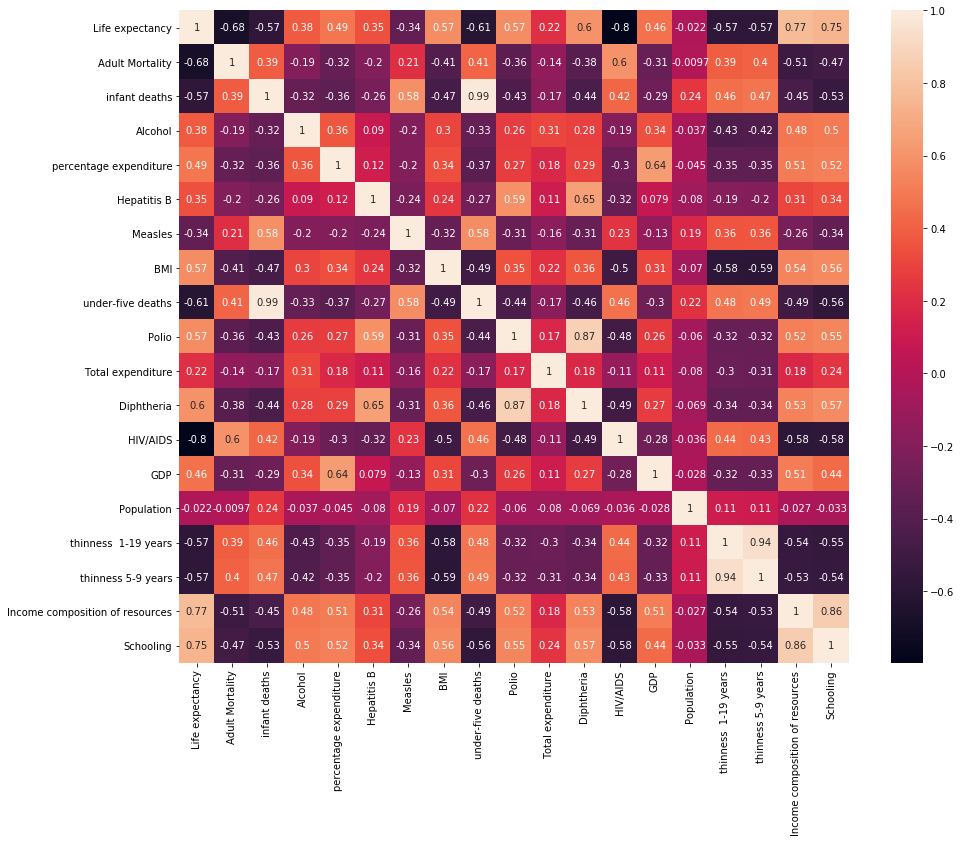

In [29]:
# Removing the year column as it is not relevant to the correlation
essential_data = data.drop(columns=['Year'])

# Creating a subplot
fig, ax = plt.subplots(figsize=(15,12)) 

# Plotting the correlation in a heatmap
sns.heatmap(essential_data.corr(), annot = True, fmt='.2g')

The selected factors with the strongest effect on child health metrics are:
- Immunisation (Diphtheria, Hepatitis B, Polio)
- Schooling
- BMI 

Before we can proceed with the investigation, we must find out whether there is a significant difference in the impact of those facors on health outcomes in developed countries vs developing countries.

A quick way to find out whether there is a statistically significant difference in the mean of two independent distributions is to perform a Student's t-test of all the factors vs metrics. 

# Difference Between Developed Countries and Developing Countries

In [30]:
# Separating developed countries and developing countries into two dataframes
developing_countries_df = data[data.Status == "Developing"] 
developed_countries_df = data[data.Status == "Developed"]

# Performing t-test between developing and developed of under-five deaths, thinness 1-19 and HIV/AIDS
descriptives, under_five_deaths_results = rp.ttest(developing_countries_df['under-five deaths'], developed_countries_df['under-five deaths'])
descriptives, thinness_results = rp.ttest(developing_countries_df['thinness  1-19 years'], developed_countries_df['thinness  1-19 years'])
descriptives, HIV_results = rp.ttest(developing_countries_df['HIV/AIDS'], developed_countries_df['HIV/AIDS'])

print("The t-values are:\n")
print("Under-five deaths: " + str(under_five_deaths_results["results"][2]))
print("Thinness 1-19 years: " + str(thinness_results["results"][2]))
print("HIV " + str(HIV_results["results"][2]))

The t-values are:

Under-five deaths: 17.1716
Thinness 1-19 years: 24.9805
HIV 16.9183


The t-values here are so high that we do not even need to specify a p-value. There is a very statistically significant difference between developing countries and developed countries. We will then conduct our investigation for developing countries and developed countries separately. 

# Analysis 1: Immunisation vs Child Mortality

We will investigate the significance of immunisation on reducing child mortality. Thus, we will find the effect of Hepatitis B, Polio and Diphtheria immunisation on under-five deaths. The hypothesis is that the higher the rate of immunisation, the lower the child mortality. 

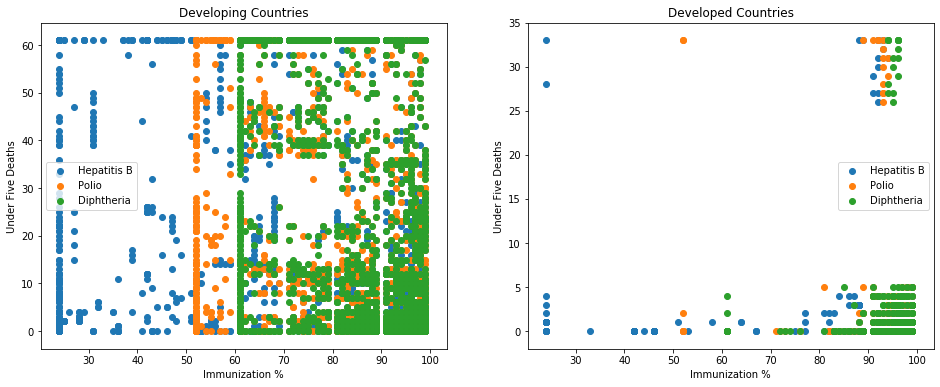

In [31]:
# Creating subplots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Plotting immunisation (Hepatitis B, Polio and Diphtheria) vs. under-five deaths for developing countries
ax1.scatter(developing_countries_df["Hepatitis B"], developing_countries_df["under-five deaths"], label='Hepatitis B')
ax1.scatter(developing_countries_df["Polio"], developing_countries_df["under-five deaths"], label='Polio')
ax1.scatter(developing_countries_df["Diphtheria"], developing_countries_df["under-five deaths"], label='Diphtheria')
ax1.set_title('Developing Countries', fontsize=12)
ax1.set_ylabel("Under Five Deaths")
ax1.set_xlabel("Immunization %")

# Plotting immunisation (Hepatitis B, Polio and Diphtheria) vs. under-five deaths for developed countries
ax2.scatter(developed_countries_df["Hepatitis B"], developed_countries_df["under-five deaths"], label='Hepatitis B')
ax2.scatter(developed_countries_df["Polio"], developed_countries_df["under-five deaths"], label='Polio')
ax2.scatter(developed_countries_df["Diphtheria"], developed_countries_df["under-five deaths"], label='Diphtheria')
ax2.set_title('Developed Countries', fontsize=12)
ax2.set_ylabel("Under Five Deaths")
ax2.set_xlabel("Immunization %")

ax1.legend()
ax2.legend()

plt.show()

## Graph Analysis
Looking at the graphs, we do not see an obvious decrease in mortality with increased immunization which is unexpected. However, to get a more accurate representation of the relationship, we have to calculate the correlation. We will use Pearson's correlation coefficient as we expect a linear relationship between the variables.

## Immunisation and Death Correlation
We expect a negative correlation between immunisation and death. The rationale is that a higher rate of immunity from diseases translates to a lower death rate from those diseases. Additionally, countries which adopt a higher rate of immunisation should also have better quality of healthcare. 

In [32]:
# Calculating correlation coefficient between immunisation (Hepatitis B, Polio and Diphtheria) vs. 
# under-five deaths in developing countries
# Correlation coefficients do no support nan values, thus, I replace nans with the mean of those columns
hep_b, _ = stats.pearsonr(developing_countries_df.fillna(developing_countries_df.mean())["Hepatitis B"], developing_countries_df.fillna(developing_countries_df.mean())["under-five deaths"])
polio, _ = stats.pearsonr(developing_countries_df.fillna(developing_countries_df.mean())["Polio"], developing_countries_df.fillna(developing_countries_df.mean())["under-five deaths"])
diph, _ = stats.pearsonr(developing_countries_df.fillna(developing_countries_df.mean())["Diphtheria"], developing_countries_df.fillna(developing_countries_df.mean())["under-five deaths"])
print("Developing countries immunization correlation with under-five deaths for: \n")
print('Hepatitis B: %.3f' % hep_b)
print('Polio: %.3f' % polio)
print('Diphtheria: %.3f \n' % diph)

# Calculating correlation coefficient between immunisation (Hepatitis B, Polio and Diphtheria) vs. 
# under-five deaths in developed countries
# Correlation coefficients do no support nan values, thus, I replace nans with the mean of those columns
hep_b, _ = stats.pearsonr(developed_countries_df.fillna(developed_countries_df.mean())["Hepatitis B"], developed_countries_df.fillna(developed_countries_df.mean())["under-five deaths"])
polio, _ = stats.pearsonr(developed_countries_df.fillna(developed_countries_df.mean())["Polio"], developed_countries_df.fillna(developed_countries_df.mean())["under-five deaths"])
diph, _ = stats.pearsonr(developed_countries_df.fillna(developed_countries_df.mean())["Diphtheria"], developed_countries_df.fillna(developed_countries_df.mean())["under-five deaths"])
print("Developed countries immunization correlation with under-five deaths for: \n")
print('Hepatitis B: %.3f' % hep_b)
print('Polio: %.3f' % polio)
print('Diphtheria: %.3f \n' % diph)

Developing countries immunization correlation with under-five deaths for: 

Hepatitis B: -0.264
Polio: -0.402
Diphtheria: -0.421 

Developed countries immunization correlation with under-five deaths for: 

Hepatitis B: 0.003
Polio: -0.179
Diphtheria: 0.035 



## Correlation Analysis

For developing countries, there is a clear negative correlation between under-five deaths and increased immunisation against Polio and Diphtheria. For Hepatitis B, there is a weaker negative correlation, however, this may be indicative of the rarity of the disease, thus, immunisation against it is not as significant factor in reducing under-five deaths. 

Conversely, there is hardly a correlation between immunisation and under-five deaths in developed countries. This may be due to the fact that those diseases are less prevalent in developed countries. Furthermore, in developed countries, herd-immunity is more likely to be developed, meaning that if enough of the population is already immune to the diseases, the diseases are effectively erradicated in that population.

# Analysis 2: Schooling vs Child Health 

We will investigate the significance of schooling on improving child health outcomes. The hypothesis is that the more years of schooling, the better the health outcomes in children. 

Text(0.5, 0, 'Years of Schooling')

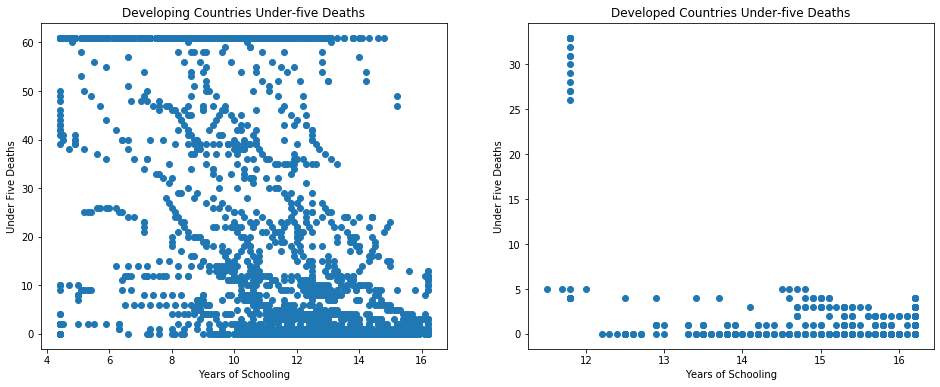

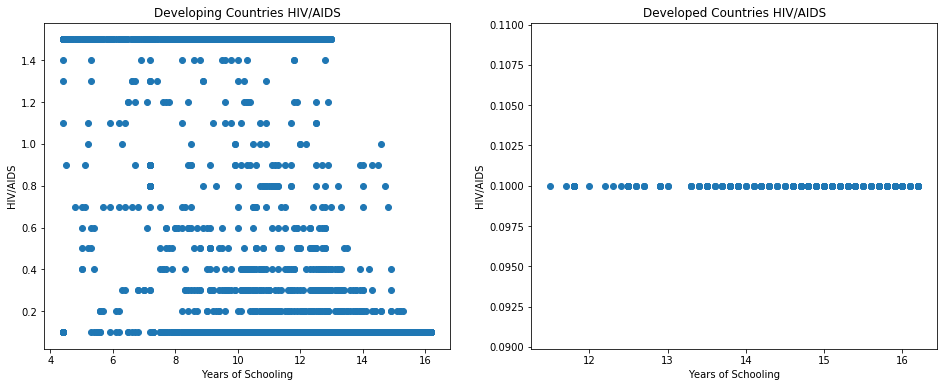

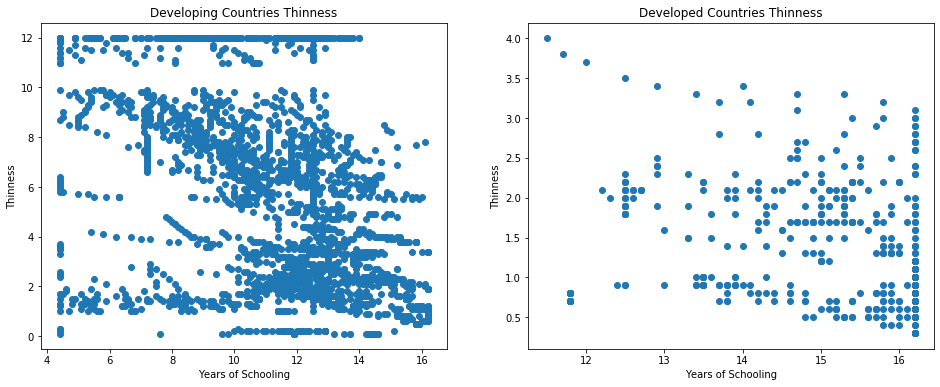

In [33]:
 fig_one, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Plotting scooling vs under-five deaths for developing countries
ax1.scatter(developing_countries_df["Schooling"], developing_countries_df["under-five deaths"])
ax1.set_title('Developing Countries Under-five Deaths', fontsize=12)
ax1.set_ylabel("Under Five Deaths")
ax1.set_xlabel("Years of Schooling")

# Plotting scooling vs under-five deaths for developed countries
ax2.scatter(developed_countries_df["Schooling"], developed_countries_df["under-five deaths"])
ax2.set_title('Developed Countries Under-five Deaths', fontsize=12)
ax2.set_ylabel("Under Five Deaths")
ax2.set_xlabel("Years of Schooling")

fig_two, (ax3, ax4) = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Plotting scooling vs HIV/AIDS for developing countries
ax3.scatter(developing_countries_df["Schooling"], developing_countries_df["HIV/AIDS"])
ax3.set_title('Developing Countries HIV/AIDS', fontsize=12)
ax3.set_ylabel("HIV/AIDS")
ax3.set_xlabel("Years of Schooling")

# Plotting scooling vs HIV/AIDS for developed countries
ax4.scatter(developed_countries_df["Schooling"], developed_countries_df["HIV/AIDS"])
ax4.set_title('Developed Countries HIV/AIDS', fontsize=12)
ax4.set_ylabel("HIV/AIDS")
ax4.set_xlabel("Years of Schooling")

fig_three, (ax5, ax6) = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Plotting scooling vs thinness 1-19 for developing countries
ax5.scatter(developing_countries_df["Schooling"], developing_countries_df["thinness  1-19 years"])
ax5.set_title('Developing Countries Thinness', fontsize=12)
ax5.set_ylabel("Thinness")
ax5.set_xlabel("Years of Schooling")

# Plotting scooling vs thinness 1-19 for developed countries
ax6.scatter(developed_countries_df["Schooling"], developed_countries_df["thinness  1-19 years"])
ax6.set_title('Developed Countries Thinness', fontsize=12)
ax6.set_ylabel("Thinness")
ax6.set_xlabel("Years of Schooling")

## Graph Analysis
Looking at the graphs, we see a general negative correlation between years of schooling and negative child health factors which is unexpected. The negative correlation appears to be stronger in developing countries than developed countries which may be due to the already high number of years of schooling in developed countries. This hints at diminishing returns, meaning that a base number of years of schooling reduces negative child health effects but has a lower effect beyond that number. Another interesting observation is that schoolign has to impact on the prevalence of HIV/AIDS, however, this number is already very close to 0, thus, leaving not much room for improvement. To get a clearer picture, we will look at the correlation between schooling and those factors. 

In [34]:
# Calculating correlation coefficient between under-five deaths vs schooling for developing countries
under_five, _ = stats.pearsonr(developing_countries_df.fillna(developing_countries_df.mean())["under-five deaths"], developing_countries_df.fillna(developing_countries_df.mean())["Schooling"])
# Calculating correlation coefficient between thinness 1-19 years vs schooling for developing countries
thinness, _ = stats.pearsonr(developing_countries_df.fillna(developing_countries_df.mean())["thinness  1-19 years"], developing_countries_df.fillna(developing_countries_df.mean())["Schooling"])
# Calculating correlation coefficient between HIV/AIDS vs schooling for developing countries
HIV, _ = stats.pearsonr(developing_countries_df.fillna(developing_countries_df.mean())["HIV/AIDS"], developing_countries_df.fillna(developing_countries_df.mean())["Schooling"])
print("Developing countries factors correlation with schooling for: \n")
print('Under-five deaths: %.3f' % under_five)
print('Thinness: %.3f' % thinness)
print('HIV/AIDS: %.3f \n' % HIV)

# Calculating correlation coefficient between under-five deaths vs schooling for developed countries
under_five, _ = stats.pearsonr(developed_countries_df.fillna(developed_countries_df.mean())["under-five deaths"], developed_countries_df.fillna(developed_countries_df.mean())["Schooling"])
# Calculating correlation coefficient between thinness 1-19 years vs schooling for developed countries
thinness, _ = stats.pearsonr(developed_countries_df.fillna(developed_countries_df.mean())["thinness  1-19 years"], developed_countries_df.fillna(developed_countries_df.mean())["Schooling"])
# Calculating correlation coefficient between HIV/AIDS vs schooling for developed countries
HIV, _ = stats.pearsonr(developed_countries_df.fillna(developed_countries_df.mean())["HIV/AIDS"], developed_countries_df.fillna(developed_countries_df.mean())["Schooling"])
print("Developed countries factors correlation with schooling for: \n")
print('Under-five deaths: %.3f' % under_five)
print('Thinness: %.3f' % thinness)
print('HIV/AIDS: %.3f \n' % HIV)

Developing countries factors correlation with schooling for: 

Under-five deaths: -0.504
Thinness: -0.446
HIV/AIDS: -0.532 

Developed countries factors correlation with schooling for: 

Under-five deaths: -0.441
Thinness: -0.206
HIV/AIDS: nan 



/Users/cedricquenette/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


## Correlation Analysis 

We can see that for developing countries, there is a negative correlation between years of schooling and negative health factors in children. This is also the case for developed countries, but to a lesser extent, especially for thinness. HIV/AIDS in developed countries is constant regardless of number of years of schooling, thus, there is no correlation.

# Analysis 3: BMI

We will analyse the impact of BMI on children health metrics. The expectation here is that BMI is normally distributed and that when plotting BMI against health metrics, the closer the BMI is to the mean the better the health outcomes. This is because the lower the BMI the higher the likelihood of malnutrition and other health problems associated with being underweight. Conversely, the higher the BMI, the higher the chance of negative health effects related to being overweight. We also expect to see that as a low overall BMI in a population is related to thinness in children. Furthermore, we expect to see little correlation between BMI and HIV/AIDS.

One important thing to consider is that BMI in this dataset is the average BMI of a country's entire population, not just the children. However, it is still a good indicator as it is reflective of the overall health of a population in a country by way of diet. 

First, we need to examine whether BMI is normally distributed as per our hypothesis. To do this, we will first do a visual analysis and then a statistical analysis. 

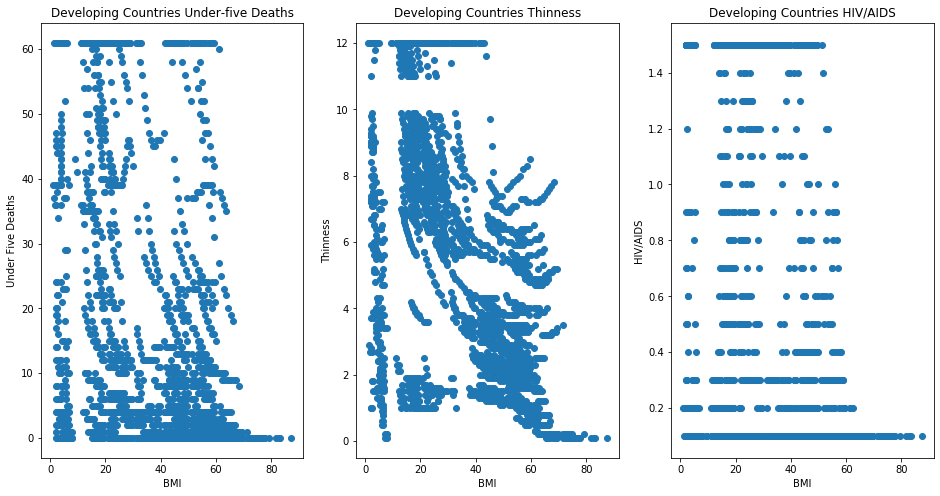

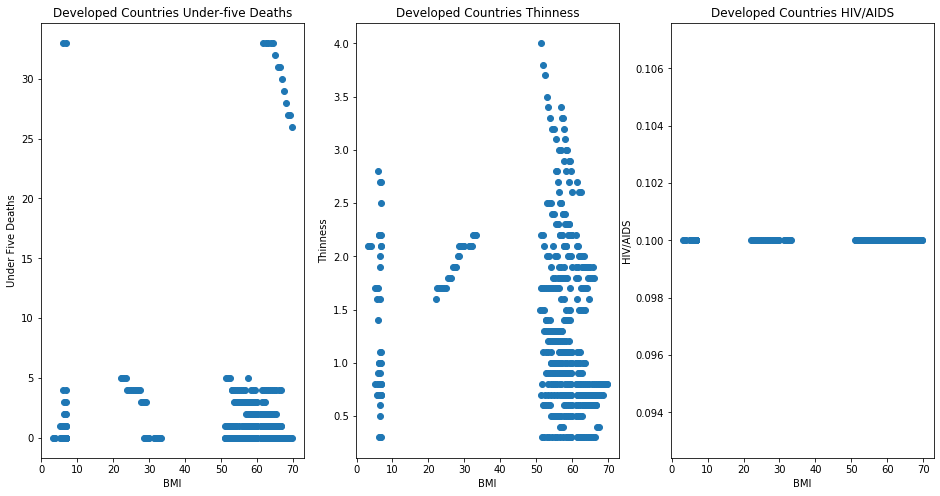

In [35]:
fig_developing, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(16, 8))

# Plotting BMI vs. under-five deaths for developing countries 
ax1.scatter(developing_countries_df["BMI"], developing_countries_df["under-five deaths"])
ax1.set_title('Developing Countries Under-five Deaths', fontsize=12)
ax1.set_ylabel("Under Five Deaths")
ax1.set_xlabel("BMI")

# Plotting BMI vs. thinness 1-19 years for developing countries
ax2.scatter(developing_countries_df["BMI"], developing_countries_df["thinness  1-19 years"])
ax2.set_title('Developing Countries Thinness', fontsize=12)
ax2.set_ylabel("Thinness")
ax2.set_xlabel("BMI")

# Plotting BMI vs. HIV/AIDS for developing countries 
ax3.scatter(developing_countries_df["BMI"], developing_countries_df["HIV/AIDS"])
ax3.set_title('Developing Countries HIV/AIDS', fontsize=12)
ax3.set_ylabel("HIV/AIDS")
ax3.set_xlabel("BMI")

fig_developed, (ax4, ax5, ax6) = plt.subplots(nrows=1, ncols=3, figsize=(16,8))

# Plotting BMI vs. under-five deaths for developed countries
ax4.scatter(developed_countries_df["BMI"], developed_countries_df["under-five deaths"])
ax4.set_title('Developed Countries Under-five Deaths', fontsize=12)
ax4.set_ylabel("Under Five Deaths")
ax4.set_xlabel("BMI")

# Plotting BMI vs. thinness 1-19 years for developed countries
ax5.scatter(developed_countries_df["BMI"], developed_countries_df["thinness  1-19 years"])
ax5.set_title('Developed Countries Thinness', fontsize=12)
ax5.set_ylabel("Thinness")
ax5.set_xlabel("BMI")

# Plotting BMI vs. HIV/AIDS for developed countries
ax6.scatter(developed_countries_df["BMI"], developed_countries_df["HIV/AIDS"])
ax6.set_title('Developed Countries HIV/AIDS', fontsize=12)
ax6.set_ylabel("HIV/AIDS")
ax6.set_xlabel("BMI")

plt.show()

## Graph Analysis

Visually, we do not see any indication of the data being normally distributed as per our hypothesis. Furthermore, any correlation in the data is not obvious, thus, we must perform a statistical analysis to get a clearer picture. 

## Normality Test

We will perform the Shapiro-Wilk test. This will identify whether BMI was drawn from a Gaussian distribution (normal distribution). Furthermore, the Shapiro test is suited for relatively "small" datasets with thousands of data points which works for our dataset.

In [36]:
# Conducting Shapiro test on BMI for developing countries 
stat, p = stats.shapiro(developing_countries_df["BMI"])
print('Results for developing countries BMI = %.3f, p=%.3f' % (stat, p))

# Conducting Shapiro test on BMI for developed countries
stat, p = stats.shapiro(developed_countries_df["BMI"])
print('Results for developed countries BMI = %.3f, p=%.3f' % (stat, p))

Results for developing countries BMI = 0.949, p=0.000
Results for developed countries BMI = 0.663, p=0.000


## Normality Analysis

Here, we can see a p-value of 0 which indicates that the data is definitely not from a Gaussian distribution. A p-value of 0 also means that we do not have to pick an alpha value as it would have been above 0.0.

This is an unexpected result and looking at the graphs, we do not see clear patterns which make sense.

To get a clear picture of whether BMI has a correlation with health metrics for children, we will perform Pearson's correlation test. 

In [37]:
# Calculating correlation coefficient between under-five deaths vs. BMI for developing countries
under_five, _ = stats.pearsonr(developing_countries_df.fillna(developing_countries_df.mean())["under-five deaths"], developing_countries_df.fillna(developing_countries_df.mean())["BMI"])
# Calculating correlation coefficient between thinness 1-19 years vs. BMI for developing countries
thinness, _ = stats.pearsonr(developing_countries_df.fillna(developing_countries_df.mean())["thinness  1-19 years"], developing_countries_df.fillna(developing_countries_df.mean())["BMI"])
# Calculating correlation coefficient between HIV/AIDS vs. BMI for developing countries
HIV, _ = stats.pearsonr(developing_countries_df.fillna(developing_countries_df.mean())["HIV/AIDS"], developing_countries_df.fillna(developing_countries_df.mean())["BMI"])
print("Developing countries factors correlation with BMI for:")
print('Under-five deaths: %.3f' % under_five)
print('Thinness: %.3f' % thinness)
print('HIV/AIDS: %.3f \n' % HIV)

# Calculating correlation coefficient between under-five deaths vs. BMI for developed countries
under_five, _ = stats.pearsonr(developed_countries_df.fillna(developed_countries_df.mean())["under-five deaths"], developed_countries_df.fillna(developed_countries_df.mean())["BMI"])
# Calculating correlation coefficient between thinness 1-19 years vs. BMI for developed countries
thinness, _ = stats.pearsonr(developed_countries_df.fillna(developed_countries_df.mean())["thinness  1-19 years"], developed_countries_df.fillna(developed_countries_df.mean())["BMI"])
# Calculating correlation coefficient between HIV/AIDS vs. BMI for developed countries
HIV, _ = stats.pearsonr(developed_countries_df.fillna(developed_countries_df.mean())["HIV/AIDS"], developed_countries_df.fillna(developed_countries_df.mean())["BMI"])
print("Developed countries factors correlation with BMI for:")
print('Under-five deaths: %.3f' % under_five)
print('Thinness: %.3f' % thinness)
print('HIV/AIDS: %.3f \n' % HIV)

Developing countries factors correlation with BMI for:
Under-five deaths: -0.474
Thinness: -0.561
HIV/AIDS: -0.478 

Developed countries factors correlation with BMI for:
Under-five deaths: 0.044
Thinness: -0.131
HIV/AIDS: nan 



## Correlation Analysis

We can see a negative correlation between BMI and health factors in developing countries and almost no correlation in developed countries. This means that for developing countries, as BMI increases, negative health factors in children decrease. 

Let us investigate why an increase in BMI resutls in better health in children. My hypothesis is that developed countries have a higher BMI and that as a country's wealth increases, so does its BMI, similarly, so does the health of its children. Basically, BMI is correlated with wealth which is in turn correlated with better health outcomes for children.

In [38]:
# Obtaining descriptive statistics of BMI in developed countries and developing countries
descriptives, BMI_results = rp.ttest(developing_countries_df['BMI'], developed_countries_df['BMI'])

descriptives

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,BMI,2426.0,35.111129,19.546760,0.396853,34.332924,35.889335
1,BMI,512.0,51.803906,17.196829,0.760000,50.310798,53.297015
2,combined,2938.0,38.020150,20.175077,0.372211,37.290329,38.749971


From a descriptive analysis of BMI between developing countries (index 0) and developed countries (index 1), we can see that developing countries have a lower mean BMI of 35 than developed countries which have a mean BMI of 52. This supports the hypothesis that a higher BMI is correlated with higher wealth in a country. We will perform Pearson's correlation test to get a more accurate picture.

In [39]:
# Calculating correlation between BMI and GDP of developing countries
BMI, _ = stats.pearsonr(developing_countries_df.fillna(developing_countries_df.mean())["BMI"], developing_countries_df.fillna(developing_countries_df.mean())["GDP"])
print('Developing countries BMI correlation with GDP: %.3f' % BMI + '\n')

# Calculating correlation coefficient between GDP and under-five deaths for developing countries
under_five_deaths, _ = stats.pearsonr(developing_countries_df.fillna(developing_countries_df.mean())["under-five deaths"], developing_countries_df.fillna(developing_countries_df.mean())["GDP"])
# Calculating correlation coefficient between GDP and thinness 1-19 years for developing countries
thinness, _ = stats.pearsonr(developing_countries_df.fillna(developing_countries_df.mean())["thinness  1-19 years"], developing_countries_df.fillna(developing_countries_df.mean())["GDP"])
# Calculating correlation coefficient between GDP and HIV/AIDS for developing countries
HIV, _ = stats.pearsonr(developing_countries_df.fillna(developing_countries_df.mean())["HIV/AIDS"], developing_countries_df.fillna(developing_countries_df.mean())["GDP"])
print('Developing countries GDP correlation with under-five deaths: %.3f' % under_five_deaths)
print('Developing countries GDP correlation with thinness: %.3f' % HIV)
print('Developing countries GDP correlation with HIV/AIDS: %.3f' % BMI)

Developing countries BMI correlation with GDP: 0.317

Developing countries GDP correlation with under-five deaths: -0.250
Developing countries GDP correlation with thinness: -0.235
Developing countries GDP correlation with HIV/AIDS: 0.317


Here we can see a weak positive correlation between GDP and BMI which further supports our hypothesis. We also proposed that the more wealthy countries have better health outcomes and we can see that negative health facors in children does indeed have a negative correlation with GDP. Surprisingly, higher GDP has a positive correlation with HIV/AIDS meaning that wealthier developing countries have a higher child death rate from HIV/AIDS. 

# Conclusion of Analysis

Now that we have investigated which factors have the biggest effect on children health, let us summarise which factors have the greatest impact per health metric. To do this, we will simply list the number 1 highest correlation per health metric. We will separate the result for developing and developed countries as the results are very different.

### Developing Countries
**Under-five deaths (Number of under-five deaths per 1000 population)**
*Schooling Number of years of Schooling (-0.504)* This suggest that education has the biggest effect on reducing child deaths. Thus, developing countries need to invest more on education to get better health oucomes for the children.

**Thinness 1-19 Years (Prevalence of thinness among children and adolescents for Age 10 to 19 (% ))**
*BMI (-0.561)*. This is also related to the GDP/wealth of a country. It does not necessarily mean that thinness has a causal decrease with an increase in BMI, hence, it might not be worth for a developing country to launch a campaign on getting people to eat more. It may however suggest that if a population has a generally low BMI, it may be due to the scarcity of food which translates to thinness in children. 

**HIV/AIDS (Deaths per 1 000 live births HIV/AIDS (0-4 years))** 
*Schooling Number of years of Schooling -0.532* This suggest that education has the biggest effect on reducing child deaths via HIV/AIDS. Thus, developing countries should spend more on deucation to reduce the rate of deaths from HIV/AIDS in children.

Overall, developing countries should focus on increasing the average number of years their population spends in school to improve the general health of their children.

### Developed Countries
**Under-five deaths (Number of under-five deaths per 1000 population)**
*Schooling Number of years of Schooling (-0.441)* Once again, the number of years of schooling is most effective for reducing the rate of under-five mortality suggesting that developed countries should also invest in education to reduce child mortality.

**Thinness 1-19 Years (Prevalence of thinness among children and adolescents for Age 10 to 19 (% ))**
*Schooling Number of years of Schooling (-0.206)* The correlation here is quite weak, but this is the best strategy for reducing thinness in children. I would propose that thinness in children in developed countries does not necessarily equate to malnutrition, thus, should not be an area of high concern for developed countries. 

**HIV/AIDS (Deaths per 1 000 live births HIV/AIDS (0-4 years))** 
For developed countries, deaths by HIV/AIDS is almost nonexistant. 

Overall, developed countries should also focus on increasing the average number of years their population spends in school to improve the general health of children. There is also a lower emphasis on immunisation due to the low rate of diseases which may suggest herd immunity. 

## Other Thoughts and Observations
It would seem that countries need to focus on improving the education of their population. This would lead to more wealth in the country as well which in turn has a positive effect on health. The only concern with increasing wealth is an increase in BMI. Developed countries have a higher than healthy mean BMI of 51.8 which is cause for concern. 